# Surprise Housing Assingment: Abhinav Joshi

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

- The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

- The company wants to know:

    - Which variables are significant in predicting the price of a house, and

    - How well those variables describe the price of a house.

- Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal 

- You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# The assingment has been divided as follows:
- I.   Loading and understanding the data
- II.  Data Cleaning
- III. Data Preperation 
- IV.  Model Building and Evaluation

# I. Loading and understanding the data

In [1]:
## importing  basic libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## loading the dataser
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## shape
housing.shape

(1460, 81)

- The dataset has 1460 columns and 81 rows

In [4]:
## checking for null-values and dtypes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
## Checking the percentage of null values
## increasing the number of rows that can be displayed
pd.set_option('display.max_rows', 90)
(housing.isnull().sum()/len(housing.index))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

- There are some null values that need to be tahen care of.
- Whether we will delete those or impute those null values will be decided after we analyse the data definition to understand what each column means and try to understand the reason behind the null values.

In [6]:
## checking for categorical variables
pd.set_option('display.max_rows', 90)
housing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

In [7]:
## checking dtypes to cross-check with unique values to look for
## numeric categorical variables
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## making a sub-data frame of only categorical variables
## we can use this sub-data frame later during the stage of preparing dummy variables 
housing_categorical = housing.select_dtypes(include='object')
housing_categorical.shape

(1460, 43)

In [9]:
## columns with categorical varaibles
housing_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

- Initial analysis based on datatypes as object suggests that there are 43 columns with categorical variables
- However when we compare the results from housing.nunique() and housing.info(), we see that there are some other variables/columns whose data types are set as int but their values are also categorical.
- The same is also confirmed when we cross-checked with the data-dictionary.
- These additional columns with categorical variables are:
    - MSSubClass
    - OverallQual
    - OverallCond
- So as of now we can say that we have 43+3 = 46 categorical varaibles/columns
- We will se further during our analysis whether we need to treat some other columns as categorical.
- We will have to keep these in mind as well while building the dummy variables.

# II. Data Cleaning

### Treating the null values 

In [10]:
## Checking the percentage of null values
(housing.isnull().sum()/len(housing.index))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

- Columns like  `Alley`, `PoolQC`, `Fence`, `MiscFeature` have very high precentage of null values,which makes a compelling case for dropping them.
- The column `FireplaceQu` has about 47% null values.
- However it would be prudent that before simply dropping these columns, we analyse these columns with the help of data dictionary to understand what they mean and the possible reason/source of these null values.

### From the Data Definition we get the following for these columns:

### Alley
- Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
### PoolQC
- PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
### Fence
- Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
### MiscFeature
- MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	 None
       
### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

- As we can see, in all these columns, `NA` does not mean `missing values`, rather each NA means something, but `Python` is `treating` these `NAs` as `missing` values or `null` values.

### As a solution, let's `replace` the `NA` values in these of these columns with their actual meanings

In [11]:
## Replacing null in alley with No alley access
housing['Alley'].fillna('No alley access',inplace=True)
housing['Alley']

0       No alley access
1       No alley access
2       No alley access
3       No alley access
4       No alley access
             ...       
1455    No alley access
1456    No alley access
1457    No alley access
1458    No alley access
1459    No alley access
Name: Alley, Length: 1460, dtype: object

In [12]:
## replacing null in PoolQC
housing['PoolQC'].fillna('No Pool',inplace=True)
## replacing null in Fence
housing['Fence'].fillna('No Fence',inplace=True)
## replacing null in MiscFeature
housing['MiscFeature'].fillna('None',inplace=True)
## replacing null in FireplaceQu
housing['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [13]:
## Again checking for null values
(housing.isnull().sum()/len(housing.index))*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

###  Now we will turn our attention to the following columns with respective null precentages:
  - LotFrontage:      17.739726%
  - MasVnrType:        0.547945%
  - MasVnrArea:        0.547945%
  - BsmtQual:          2.534247%
  - BsmtCond:          2.534247%
  - BsmtExposure:      2.602740%
  - BsmtFinType1:      2.534247%
  - BsmtFinType2:      2.602740%
  - Electrical:        0.068493%
  - GarageType:        5.547945%
  - GarageYrBlt:       5.547945%
  - GarageFinish:      5.547945% 
  - GarageQual:        5.547945%
  - GarageCond:        5.547945%
  


In [14]:
## Lookaing at LotFrontage
## LotFrontage: Linear feet of street connected to property
housing['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

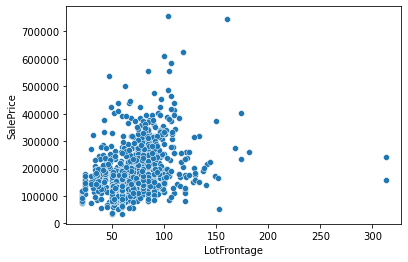

In [15]:
## Let's see a scatter plot between LotFrontage and Saleprice
sns.scatterplot(x='LotFrontage',y='SalePrice',data=housing)
plt.show()

- Though there seems to be some relation between the two, the nature of this relationship is not so clear.
- Let's try to look at the correlation of LotFrontage with SalePrice

In [16]:
## correlation of LotFrontage with SalePrice
housing['SalePrice'].corr(housing['LotFrontage'])

0.3517990965706781

- Correlation is not that high.
- Approach we will take is that we will impute the missing values with the median 
- Why are we choosing this approach?
  - Getting additional information from outside would have been the best approach as a good approach adds information, but here we had no access to any relevant outside information.
  - Dropping these null rows also would have been a good approach, but since we have less number of data points we will not use dropping method
  - Hence, we are left with the third best option of imputing values.
  - Imputing with zero or the mean  would not be the correct approach, hence we are imputing with median

In [17]:
## checking the median of 'LotFrontage
housing['LotFrontage'].median()

69.0

In [18]:
## Imputing null values in LotFrontage with the median (69)
housing['LotFrontage'].fillna(69,inplace=True)

In [19]:
housing['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [20]:
## checking the datatype
housing['LotFrontage'].dtype

dtype('float64')

In [21]:
## again checking the correlation 
housing['SalePrice'].corr(housing['LotFrontage'])

0.33477085313976

- Not a substantial change, hence our appraoch was ok.

### Now coming to other null values: 
- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       
- For MasVnrType we will replace NA with None


       
- BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
- BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
- BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
- BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
- BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
-  For BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 we will replace NA with No Basement

- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
- For GarageType,GarageFinish,GarageQual,GarageCond we will replace NA with No Garage

In [22]:
## replacing MasVnrType  NA with None
housing['MasVnrType'].fillna('None',inplace=True)

In [23]:
## Replacing BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 NA with No Basement
## we will use for loop
for cols in ('BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    housing[cols].fillna('No Basement',inplace=True)

In [24]:
## Replacing GarageType,GarageFinish,GarageQual NA with No Garage
## we will use a for loop
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    housing[col].fillna('No Garage',inplace=True)    

In [25]:
## Checking the null percentages
(housing.isnull().sum()/len(housing.index))*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

### Now let's analyse GarageYrBlt
- We saw earlier that the following columns had the respecitve null value percentages
- GarageType: 5.547945%
- GarageYrBlt: 5.547945%
- GarageFinish: 5.547945%
- GarageQual: 5.547945%
- GarageCond: 5.547945%
- All had exactly the same percentage of null values.
- We also saw that except for `GarageYrBlt`, all other variables were categorical and for them the NA values actually correspended to `No Garage`
- There is a very high likeability that the null values in `GarageYrBlt`, also correspond to `No Garage`
- Lets build a sub-dataframe with only the above mentioned variables and then let's see only those values where `GarageYrBlt` comes out to be NA.

In [26]:
## building  a sub-dataframe of only garage variables
housing_garage = housing[['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual']]
housing_garage.head()         


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
0,Attchd,2003.0,RFn,2,548,TA
1,Attchd,1976.0,RFn,2,460,TA
2,Attchd,2001.0,RFn,2,608,TA
3,Detchd,1998.0,Unf,3,642,TA
4,Attchd,2000.0,RFn,3,836,TA


In [27]:
## selecting rows where GarageYrBlt comes out to be NA
housing_garage[housing_garage['GarageYrBlt'].isna()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual
39,No Garage,NaN,No Garage,0,0,No Garage
48,No Garage,NaN,No Garage,0,0,No Garage
78,No Garage,NaN,No Garage,0,0,No Garage
88,No Garage,NaN,No Garage,0,0,No Garage
89,No Garage,NaN,No Garage,0,0,No Garage
99,No Garage,NaN,No Garage,0,0,No Garage
108,No Garage,NaN,No Garage,0,0,No Garage
125,No Garage,NaN,No Garage,0,0,No Garage
127,No Garage,NaN,No Garage,0,0,No Garage
140,No Garage,NaN,No Garage,0,0,No Garage


- As we suspected, `GarageYrBlt` has `NAN` values for cases of `No Garage`.
- Though `GarageYrBlt` represents  data corresponding to a year, but since it's `not time stamped data` we can treat it like a categorical variable.
- Let's replace the NAN with 0

In [28]:
## replacing GarageYrBlt nulls with 0
housing['GarageYrBlt'].fillna(0,inplace=True)

In [29]:
## taking care of MasVnrArea
housing['MasVnrArea'].median()

0.0

In [30]:
## replacing the null in MasVnrArea with its median
housing['MasVnrArea'].fillna(0,inplace=True)

In [31]:
## Again checking the null values
(housing.isnull().sum()/len(housing.index))*100

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.000000
MasVnrArea       0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.000000
BsmtCond         0.000000
BsmtExposure     0.000000
BsmtFinType1     0.000000
BsmtFinSF1       0.000000
BsmtFinType2     0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

- Now we have a relatively clean dataset, we have intentionally left some values as null
- Let's move to the next stage of data cleaning.

## Checking for duplicates

In [32]:
housing.duplicated().value_counts()

False    1460
dtype: int64

- No duplicated values in the Dataframe

## Dropping some columns

- We saw during the initial stages that columns like `Alley`,`PoolQC` and `MiscFeature` had more than 90% null values, which we replaced.
- But these columns had more than 90% of the same value, these columns would not contirbute much to our analysis or even skew the analysis, so we will be dropping these columns.
- We will also drop `ID` column as it will not contribute to our analysis.

In [33]:
## dropping Alley,PoolQC,MiscFeature and ID
housing = housing.drop(['Alley','PoolQC','MiscFeature','Id'],axis=1)
housing.shape

(1460, 77)

- For rest of the columns, let's do further analysis and then decide on dropping columns

## Data Visualisation and Further Dropping
- Since the dataset has a high number of both continous and categorical variables, for the ease of analysis, let's create two sub-dataframes, one containing only the continous variables and the other containing only categorical variables.
- Let's call the one containing the continous variables as `housing_continous`.
- And let's call the other containing the categorical variables as `housing_categorical`.
- We will also fine-tune these two as some categorical variables having integer values were not included in housing_categorical.
- Then based on visualisation results, we will be dropping some additional columns if the need arises.
- And fianlly we will be merging the resultant dataframes to make the `final dataframe` `housing_final` with which we will be `building` our `models`.
- We will look for co-relations  to further drop columns and maybe engineer some new feature/s before we move to data preperation stage.

In [34]:
## Creating housing_categorical
housing_categorical = housing.select_dtypes(include='object')
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal


In [35]:
## shape
housing_categorical.shape

(1460, 40)

In [36]:
## Creating housing_continous
housing_continous = housing.select_dtypes(include=['int','float'])
housing_continous.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [37]:
## looking for number of unique values
housing_continous.nunique()

MSSubClass         15
LotFrontage       110
LotArea          1073
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
MasVnrArea        327
BsmtFinSF1        637
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       12
Fireplaces          4
GarageYrBlt        98
GarageCars          5
GarageArea        441
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
MiscVal            21
MoSold             12
YrSold              5
SalePrice         663
dtype: int64

- From here and by verifying with data dictionary, we can see that the follwing columns are categorical, though they have numeric values:

OverallQual        
OverallCond         
YearBuilt         
YearRemodAdd       
BsmtFullBath        
BsmtHalfBath        
FullBath            
HalfBath            
BedroomAbvGr       
KitchenAbvGr       
BedroomAbvGr       
KitchenAbvGr        
GarageYrBlt        
GarageCars         
PoolArea            
MoSold             
YrSold            
- We will be dropping these from housing_continous and later concatenating them to housing_categorical.

In [38]:
## dropping the categorical columns from housing_continous
housing_continous =  housing_continous.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'],axis=1)

### Now let's check for Correlations among these

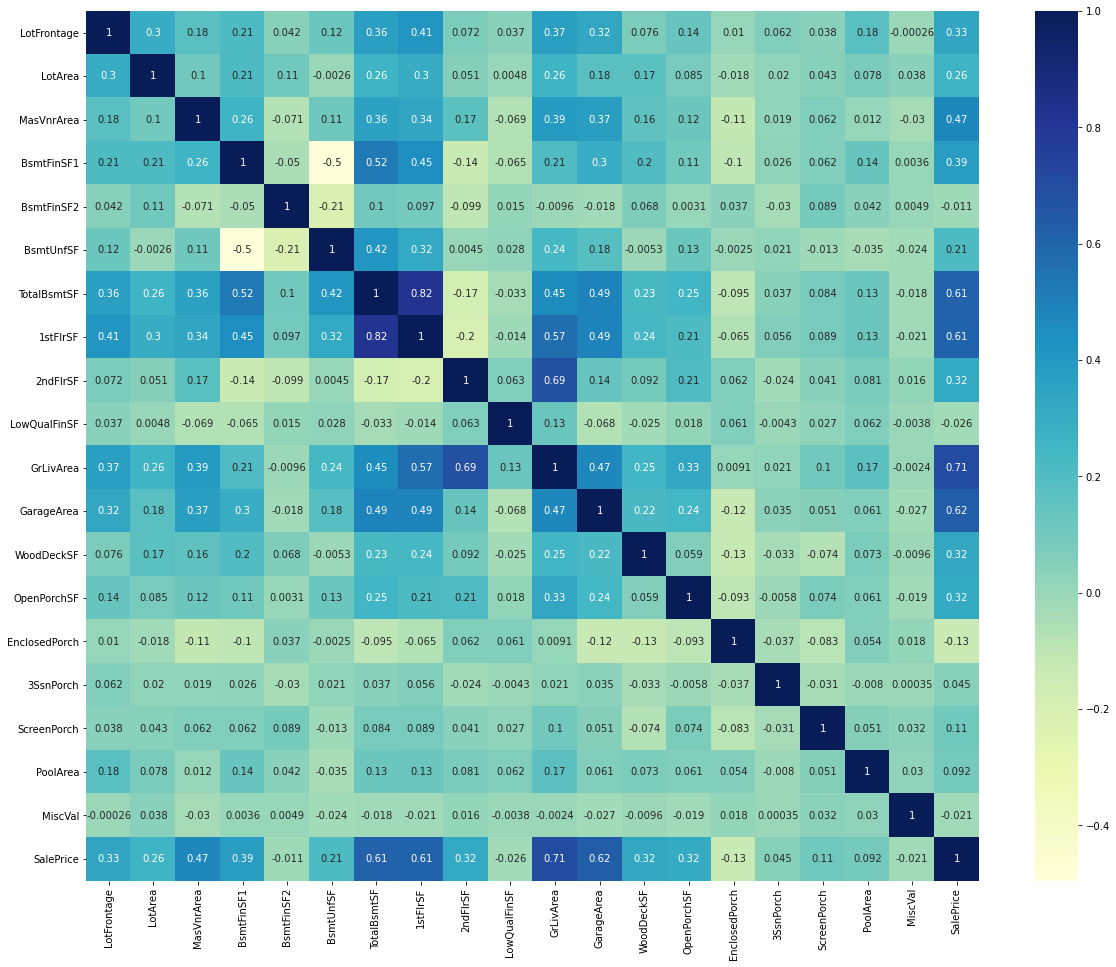

In [39]:
## mapping a heatmap to see the correlations
plt.figure(figsize=(20,16))
sns.heatmap(housing_continous.corr(),cmap='YlGnBu',annot=True)
plt.show()

- We can see that :
- SalePrice is highly positively related with TotalBsmtSF, GrLivArea, 1stFlrSF and GarageArea
- SalePrice is not strongly negatively reated to any variable
- BsmtFinSF2,LowQualFinSF, 3SsnPorch,PoolArea and MiscVal have a very weak correlation with SalePrice, retaining these won't contribute much to our analysis, so we will be dropping these as well. 
- TotalBsmtSF and 1stFlrSF show a correlation of 82% and they have the same correlation of 61% with SalePrice
- So we will be dropping one.

In [40]:
## dropping 1stFlrSF
housing_continous =  housing_continous.drop(['1stFlrSF'],axis = 1)

In [41]:
## dropping BsmtFinSF2,LowQualFinSF, 3SsnPorch,PoolArea and MiscVal
housing_continous =  housing_continous.drop(['BsmtFinSF2','LowQualFinSF','3SsnPorch','PoolArea'],axis = 1)
housing_continous.shape

(1460, 15)

In [42]:
## checking the columns in housing_continous
cols = housing_continous.columns
cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

<Figure size 1440x1152 with 0 Axes>

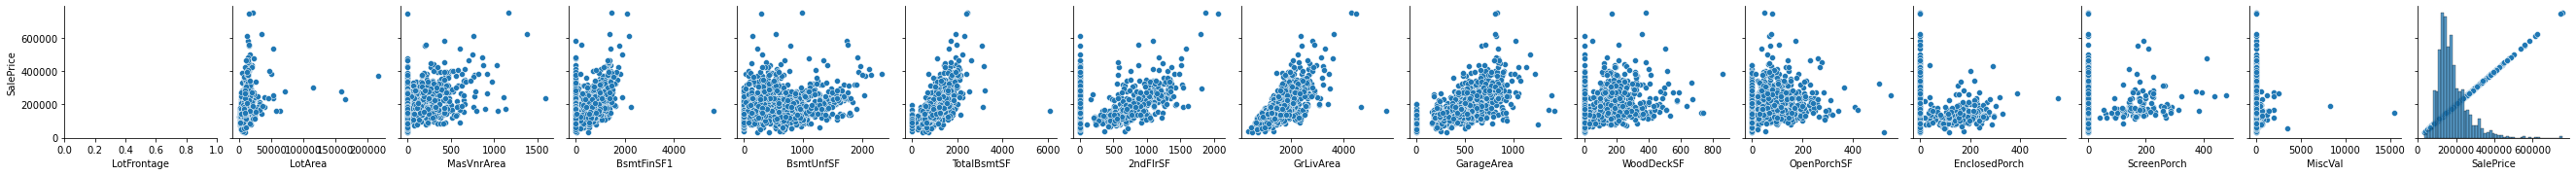

In [43]:
## let's see a pairplot among the variables in housing_continous against SalePrice
plt.figure(figsize=(20,16))
sns.pairplot(data = housing_continous,x_vars=cols,y_vars='SalePrice')
plt.show()

- SalePrice does not share a very good linear relation with any of the variables.

### Let's see the distplots of only the varaibles having high correlation with SalePrice
- Since we have a large number of columns, hence we are selecting only a few for this analyis

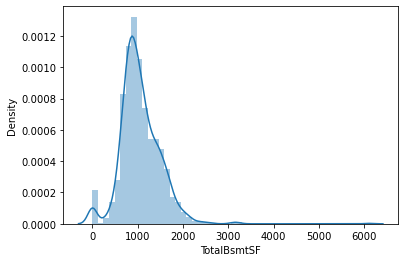

Skewness: 1.524255


In [44]:
sns.distplot(housing_continous['TotalBsmtSF'])
plt.show()
print("Skewness: %f" % housing['TotalBsmtSF'].skew())

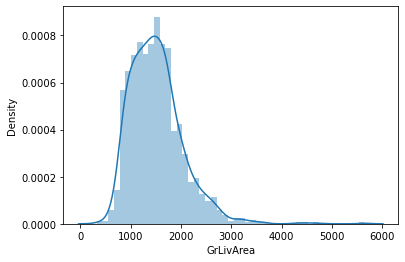

Skewness: 1.366560


In [45]:
sns.distplot(housing_continous['GrLivArea'])
plt.show()
print("Skewness: %f" % housing['GrLivArea'].skew())

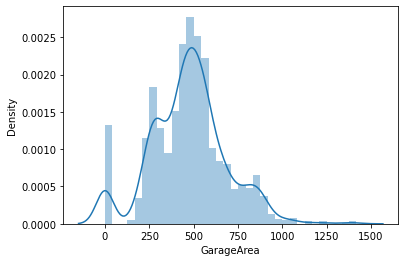

Skewness: 0.179981


In [46]:
sns.distplot(housing_continous['GarageArea'])
plt.show()
print("Skewness: %f" % housing['GarageArea'].skew())

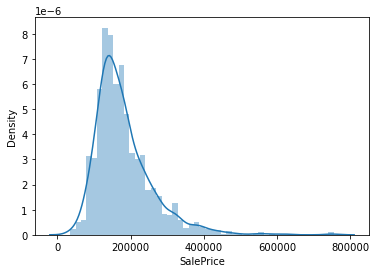

Skewness: 1.882876


In [47]:
sns.distplot(housing_continous['SalePrice'])
plt.show()
print("Skewness: %f" % housing['SalePrice'].skew())

- We can live with the skewness in the Independent variables, but the target variable SalePrice shows high skewness, this we will address at `Feature Engineering stage`.

## Outlier Treament

In [48]:
## checking the percentiles in the range [.25, .5, .75, .90, .95, .99
housing_continous.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,103.117123,443.639726,567.240411,1057.429452,346.992466,1515.463699,472.980137,94.244521,46.660274,21.954110,15.060959,43.489041,180921.195890
std,22.027677,9981.264932,180.731373,456.098091,441.866955,438.705324,436.528436,525.480383,213.804841,125.338794,66.256028,61.119149,55.757415,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,477.500000,991.500000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,163000.000000
75%,79.000000,11601.500000,164.250000,712.250000,808.000000,1298.250000,728.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14381.700000,335.000000,1065.500000,1232.000000,1602.200000,954.200000,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,278000.000000
95%,104.000000,17401.150000,456.000000,1274.000000,1468.000000,1753.000000,1141.050000,2466.100000,850.100000,335.000000,175.050000,180.150000,160.000000,0.000000,326100.000000
99%,137.410000,37567.640000,791.280000,1572.410000,1797.050000,2155.050000,1418.920000,3123.480000,1002.790000,505.460000,285.820000,261.050000,268.050000,700.000000,442567.010000


- There seem to be presence of outliers. 
- We need to cap these outliers as their presence would affect scaling and also model accuracy.
- Since we have a limited number of rows, we can't afford to delete many items.
- The approach we would take is to keep the data range between 25% to 99%.

### Visualising some of the ouliers with the help of boxplots.

In [49]:
import seaborn as sns

In [50]:
housing_continous.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

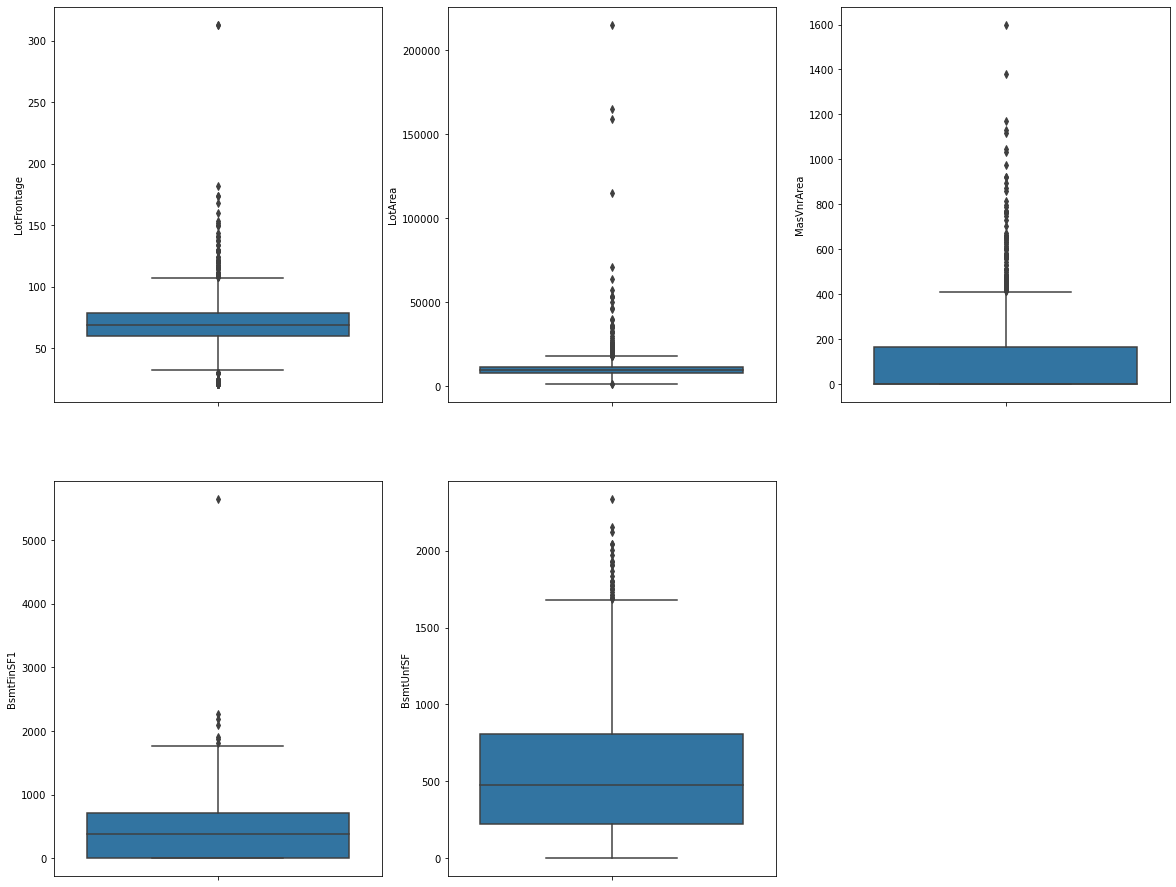

In [51]:
## Plotting boxplots for 'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF'
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(y= housing_continous['LotFrontage'])
plt.subplot(2,3,2)
sns.boxplot(y= housing_continous['LotArea'])
plt.subplot(2,3,3)
sns.boxplot(y =housing_continous['MasVnrArea'])
plt.subplot(2,3,4)
sns.boxplot(y=housing_continous['BsmtFinSF1'])
plt.subplot(2,3,5)
sns.boxplot(y = housing_continous['BsmtUnfSF'])
plt.show()

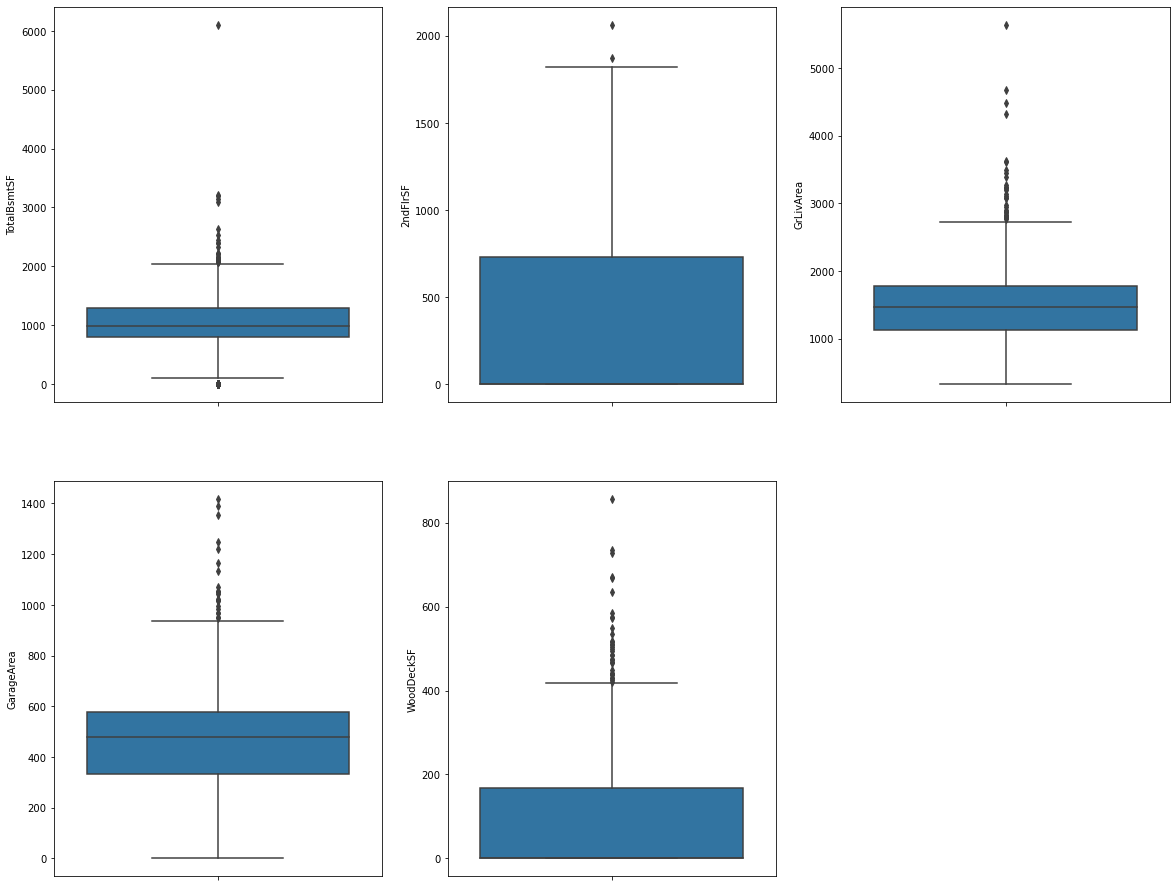

In [52]:
## Plotting boxplots for 'TotalBsmtSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF'
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(y= housing_continous['TotalBsmtSF'])
plt.subplot(2,3,2)
sns.boxplot(y= housing_continous['2ndFlrSF'])
plt.subplot(2,3,3)
sns.boxplot(y =housing_continous['GrLivArea'])
plt.subplot(2,3,4)
sns.boxplot(y=housing_continous['GarageArea'])
plt.subplot(2,3,5)
sns.boxplot(y = housing_continous['WoodDeckSF'])
plt.show()

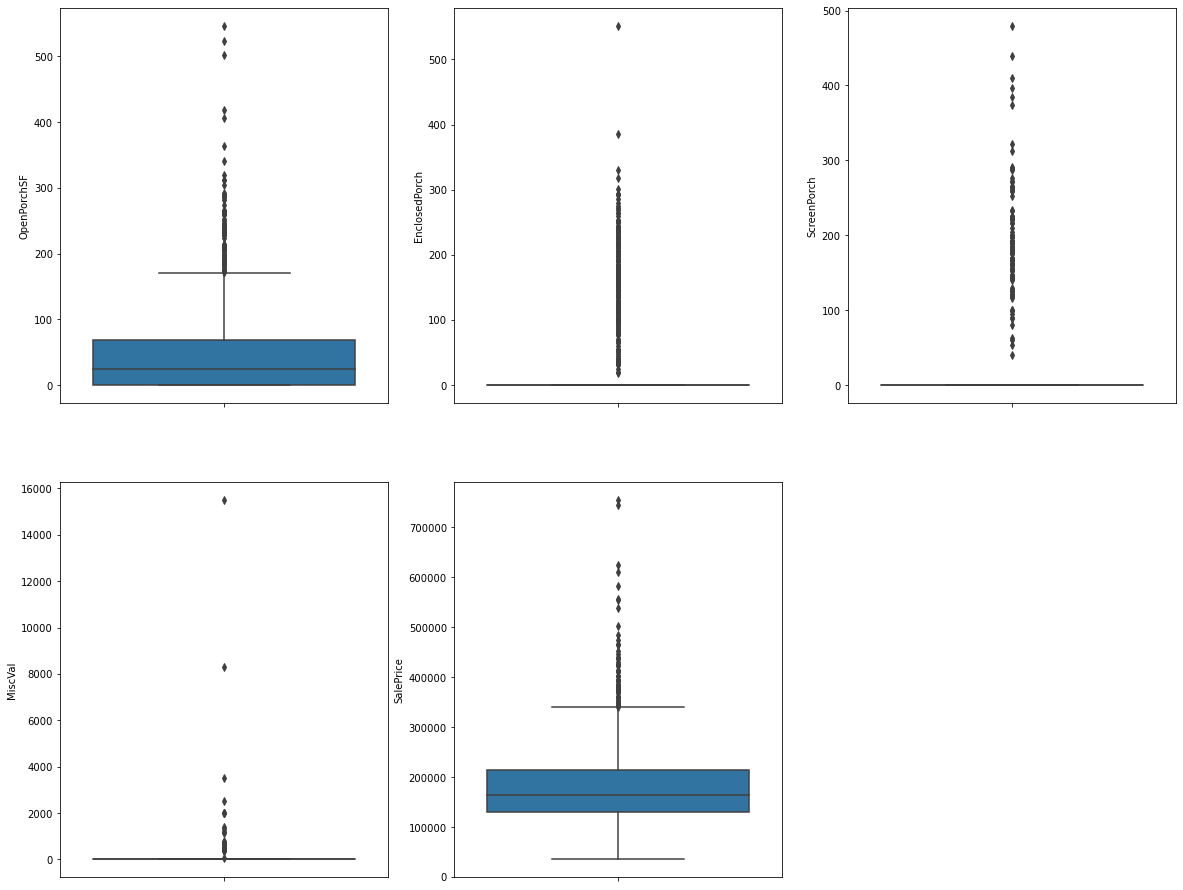

In [53]:
## Plotting boxplots for 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(y= housing_continous['OpenPorchSF'])
plt.subplot(2,3,2)
sns.boxplot(y= housing_continous['EnclosedPorch'])
plt.subplot(2,3,3)
sns.boxplot(y =housing_continous['ScreenPorch'])
plt.subplot(2,3,4)
sns.boxplot(y=housing_continous['MiscVal'])
plt.subplot(2,3,5)
sns.boxplot(y = housing_continous['SalePrice'])
plt.show()

- Some variables have a high number of outliers while others don't
- To bring a parity we will cap the data in the range 25% to 99%.

In [54]:
## Treating outliers
continous_col = housing_continous.columns
def drop_outliers(x):
    list = []
    for col in continous_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

housing_continous = drop_outliers(housing_continous)

In [55]:
housing_continous.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,69.474412,10035.917012,102.488243,437.880360,569.153527,1052.770401,345.793223,1509.954357,472.480636,93.827109,46.644537,22.066390,14.786307,16.939142,180558.226833
std,20.083158,5457.970052,179.858771,434.696488,442.759059,417.110431,435.498876,513.000952,212.592107,124.389123,66.143157,61.293686,54.734812,108.725898,79352.351074
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7508.750000,0.000000,0.000000,225.000000,795.250000,0.000000,1128.500000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,69.000000,9452.500000,0.000000,379.500000,481.500000,990.000000,0.000000,1458.000000,478.500000,0.000000,25.000000,0.000000,0.000000,0.000000,162900.000000
75%,79.000000,11509.000000,163.750000,707.500000,810.750000,1290.250000,728.000000,1773.250000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,213430.000000
max,182.000000,70761.000000,1600.000000,2260.000000,2336.000000,3206.000000,2065.000000,4676.000000,1390.000000,857.000000,547.000000,552.000000,480.000000,1400.000000,755000.000000


In [56]:
housing_continous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1446 non-null   float64
 1   LotArea        1446 non-null   int64  
 2   MasVnrArea     1446 non-null   float64
 3   BsmtFinSF1     1446 non-null   int64  
 4   BsmtUnfSF      1446 non-null   int64  
 5   TotalBsmtSF    1446 non-null   int64  
 6   2ndFlrSF       1446 non-null   int64  
 7   GrLivArea      1446 non-null   int64  
 8   GarageArea     1446 non-null   int64  
 9   WoodDeckSF     1446 non-null   int64  
 10  OpenPorchSF    1446 non-null   int64  
 11  EnclosedPorch  1446 non-null   int64  
 12  ScreenPorch    1446 non-null   int64  
 13  MiscVal        1446 non-null   int64  
 14  SalePrice      1446 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 180.8 KB


- Outlier treatment lead to a loss of 16 rows.

### Making housing_categorical

In [57]:
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal


In [58]:
## now we have to add numeric categorical columns as well
## we will create a dataframe housing_categorical_num from the housing dataframe
## housing_categorical_num will contain the variables whose data type is not object
## but we will treat them as categorial
housing_categorical_num = housing[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold']]

In [59]:
## checking housing_categorical_num
housing_categorical_num.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,60,7,5,2003,2003,1,0,2,1,3,1,8,0,2003.0,2,2,2008
1,20,6,8,1976,1976,0,1,2,0,3,1,6,1,1976.0,2,5,2007
2,60,7,5,2001,2002,1,0,2,1,3,1,6,1,2001.0,2,9,2008
3,70,7,5,1915,1970,1,0,1,0,3,1,7,1,1998.0,3,2,2006
4,60,8,5,2000,2000,1,0,2,1,4,1,9,1,2000.0,3,12,2008


In [60]:
## concatenating housing_categorical_num to housing_categorical
housing_categorical =  pd.concat([housing_categorical,housing_categorical_num],axis=1)

In [61]:
housing_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,1,3,1,8,0,2003.0,2,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2,0,3,1,6,1,1976.0,2,5,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2,1,3,1,6,1,2001.0,2,9,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1,0,3,1,7,1,1998.0,3,2,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2,1,4,1,9,1,2000.0,3,12,2008


### To analyse the categorical varaibles we will use:
  - 1. Countplots to check for skewness and  if one category in variable dominates more than 90% we will consider dropping it after giving a thought about the reason for such domination.
  - 2. Boxplots and Barplots to see their Relationship with 'SalePrice'
  - 3. Correalation matrix to see Correlations among the independent varaibles and their Correlations with the dependent variable.( Here we will use df_test)
- Approach: We wil be dropping columns and final dataframe will give us the list of the columns to be maintained 

In [62]:
## Getting the list of columns
housing_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition',
       'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

### Let's start with countplots to check for skewness
- We will plot countplots for the categorial variables
- Those variables in which one category dominates about 90% of the total,. would be dropped

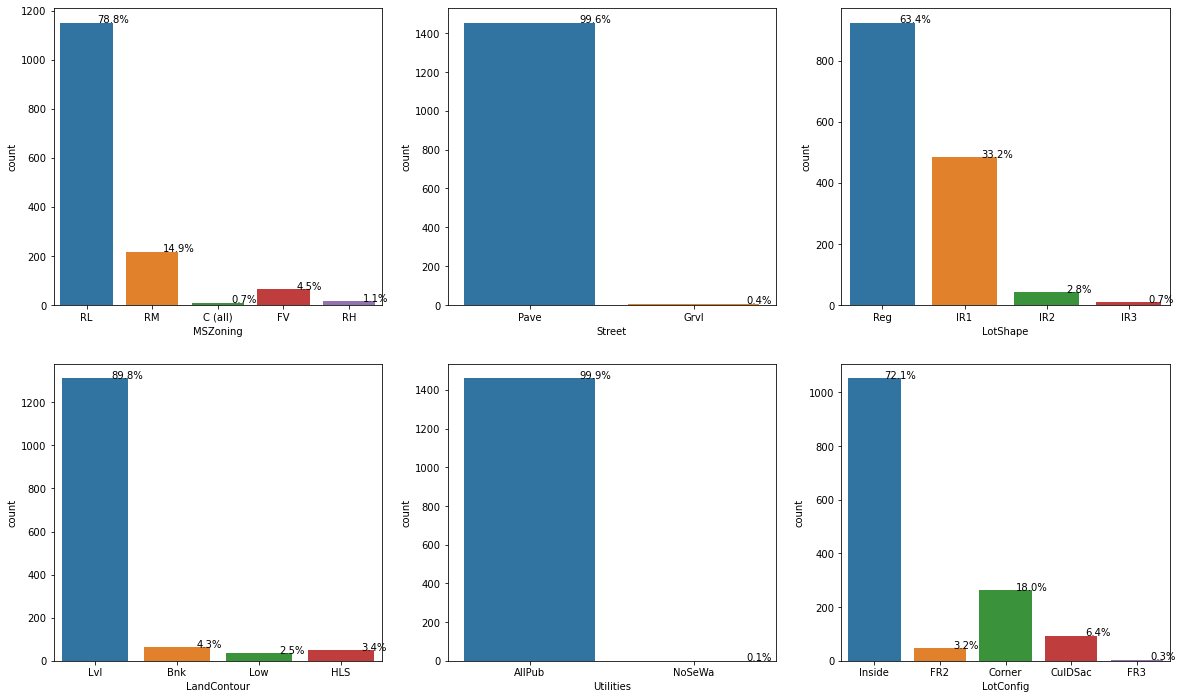

In [63]:
## Checking Skewness in 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities'and 'LotConfig'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['MSZoning'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['Street'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['LotShape'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['LandContour'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['Utilities'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['LotConfig'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- Street, LandContour and Utilities show high skewness(around 90%) in favours of one category, so we will be dropping these.

In [64]:
## Dropping Street, LandContour and Utilities 
housing_categorical = housing_categorical.drop(['Street', 'LandContour','Utilities'],axis = 1)

In [65]:
## again checking the list of columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

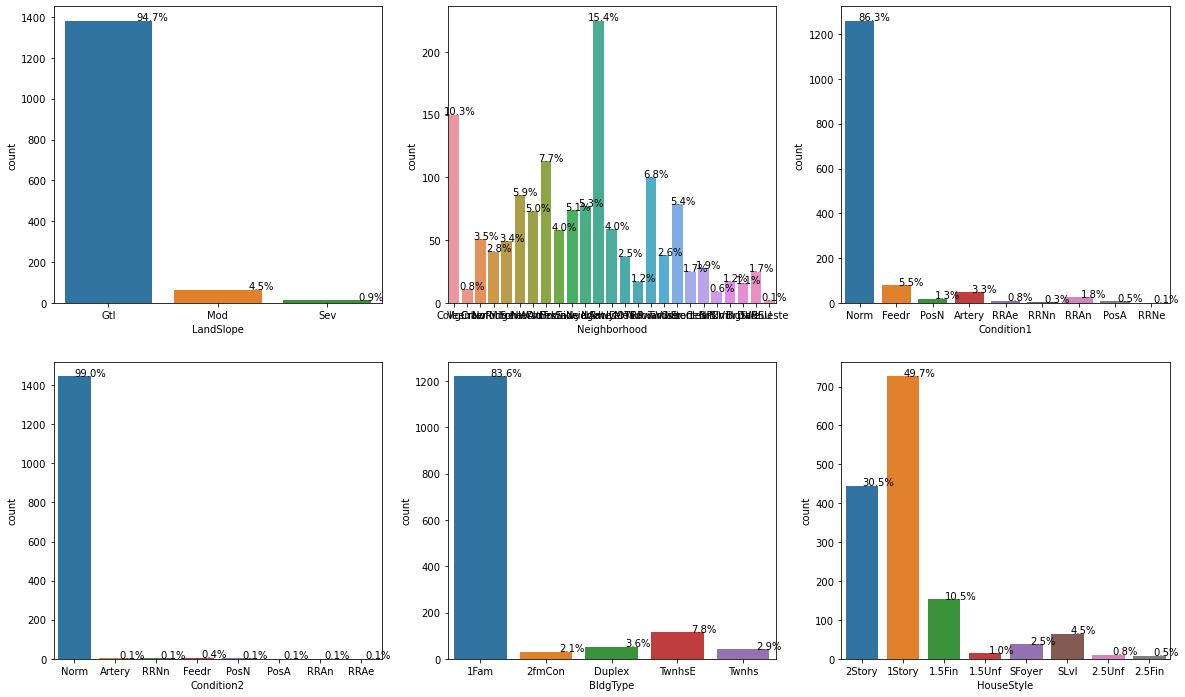

In [66]:
## Checking Skewness in 'LandSlope', 'Neighborhood','Condition1', 'Condition2', 'BldgType'and 'HouseStyle'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['LandSlope'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['Neighborhood'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['Condition1'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['Condition2'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['BldgType'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['HouseStyle'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- LandSlope, Condition1, Condition2 and BldgType show high skewness in favour of one category, so we will be dropping these.

In [67]:
## dropping LandSlope, Condition1, Condition2 and BldgType 
housing_categorical = housing_categorical.drop(['LandSlope', 'Condition1', 'Condition2','BldgType'],axis=1)

In [68]:
## Checking housing_categorical columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold',
       'YrSold'],
      dtype='object')

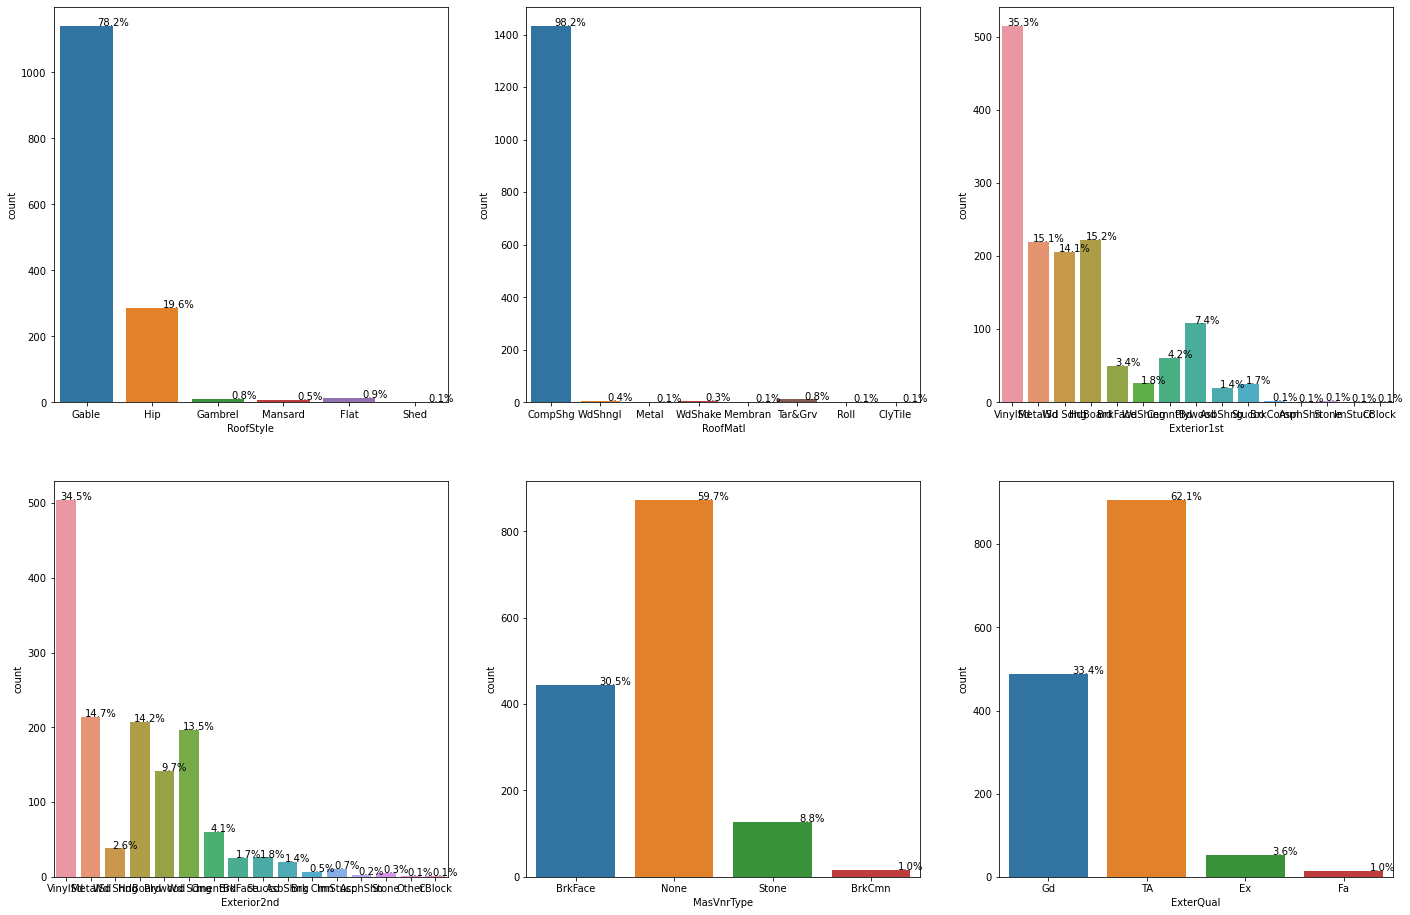

In [69]:
## Checking Skewness in 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType' and 'ExterQual'
plt.figure(figsize=(24,16))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['RoofStyle'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['RoofMatl'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['Exterior1st'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['Exterior2nd'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['MasVnrType'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['ExterQual'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- RoofMatl shows high skewness in favour of one category, so we will be dropping this.

In [70]:
## dropping RoofMatl 
housing_categorical = housing_categorical.drop(['RoofMatl'],axis =1)

In [71]:
## Checking columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

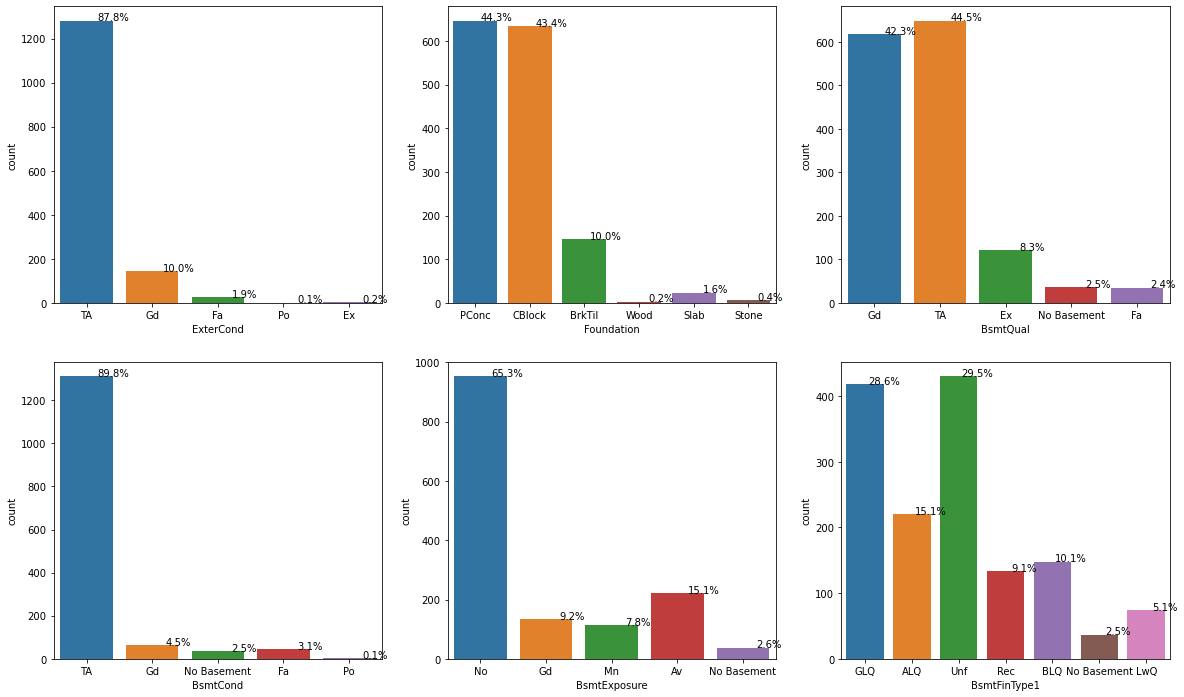

In [72]:
## Checking Skewness in 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure' and 'BsmtFinType1'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['ExterCond'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['Foundation'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['BsmtQual'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['BsmtCond'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['BsmtExposure'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['BsmtFinType1'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- ExterCond and BsmtCond shows high skewness in favour of one category, so we will be dropping these.

In [73]:
## dropping ExterCond and BsmtCond
housing_categorical = housing_categorical.drop(['ExterCond','BsmtCond'],axis =1)

In [74]:
## checking columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

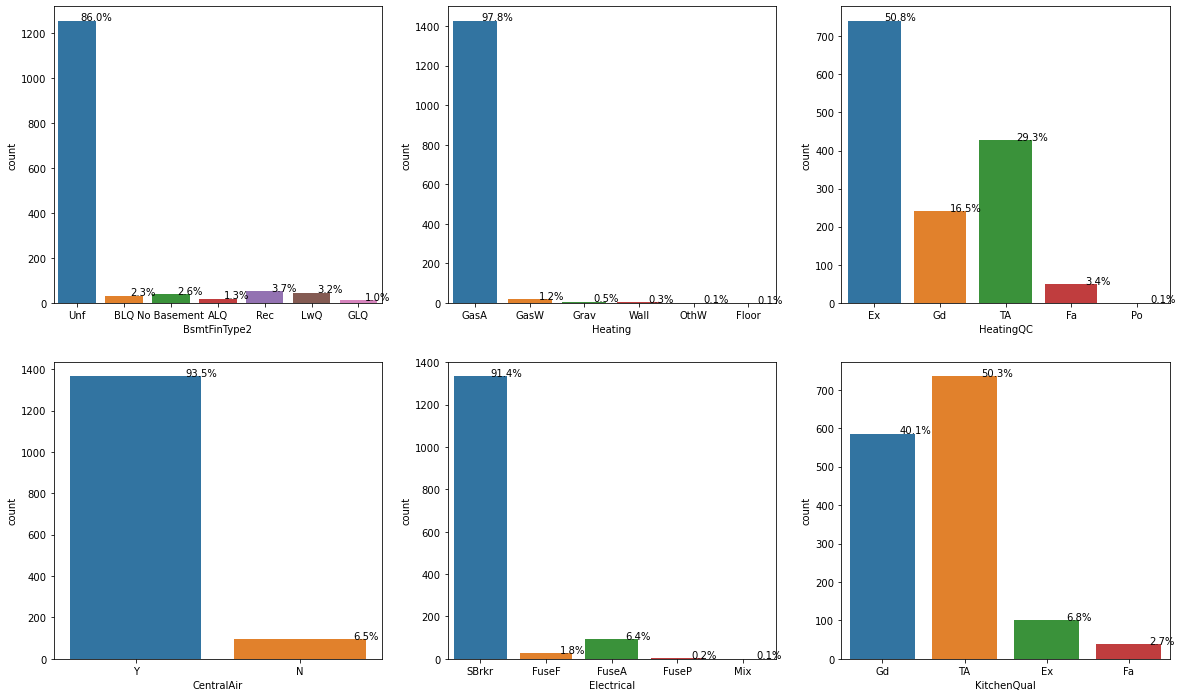

In [75]:
## Checking Skewness in 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical' and 'KitchenQual'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['BsmtFinType2'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['Heating'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['HeatingQC'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['CentralAir'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['Electrical'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['KitchenQual'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 'BsmtFinType2', 'Heating','CentralAir' and 'Electrical', show high skewness in favour of one category, so we will be dropping these.

In [76]:
## dropping 'BsmtFinType2', 'Heating','CentralAir' and 'Electrical'
housing_categorical = housing_categorical.drop(['BsmtFinType2', 'Heating','CentralAir','Electrical'],axis=1)

In [77]:
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

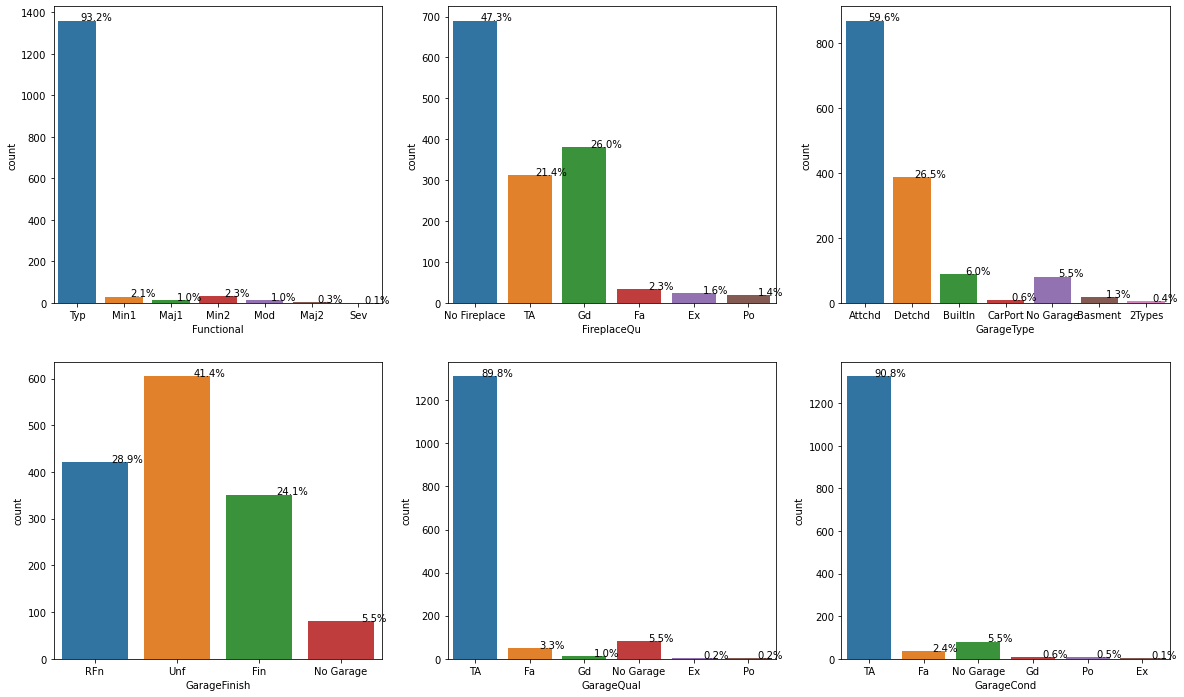

In [78]:
## Checking skewness in 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['Functional'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['FireplaceQu'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['GarageType'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['GarageFinish'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['GarageQual'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['GarageCond'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 'Functional', 'GarageQual', 'GarageCond' show high skewness in favour of one category, so we will be dropping these.

In [79]:
## Dropping 'Functional', 'GarageQual' and 'GarageCond'
housing_categorical = housing_categorical.drop(['Functional', 'GarageQual','GarageCond'],axis=1)

In [80]:
## Checking Columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

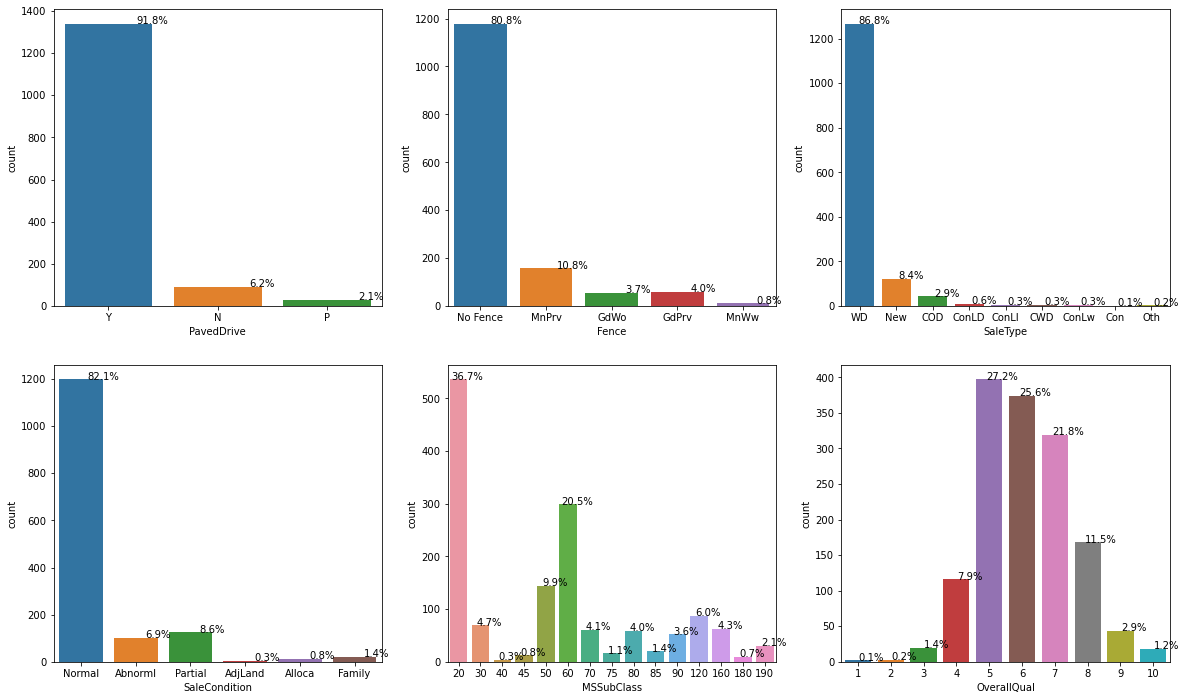

In [81]:
## Checkinmg Skewness in PavedDrive', 'Fence', 'SaleType', 'SaleCondition', 'MSSubClass' and'OverallQual'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['PavedDrive'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['Fence'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['SaleType'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['SaleCondition'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['MSSubClass'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['OverallQual'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- 'PavedDrive' and 'SaleType' show high skewness in favour of one category, so we will be dropping these.

In [82]:
## Dropping 'PavedDrive' and 'SaleType' 
housing_categorical = housing_categorical.drop(['PavedDrive','SaleType' ],axis=1)

In [83]:
## Checking Columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

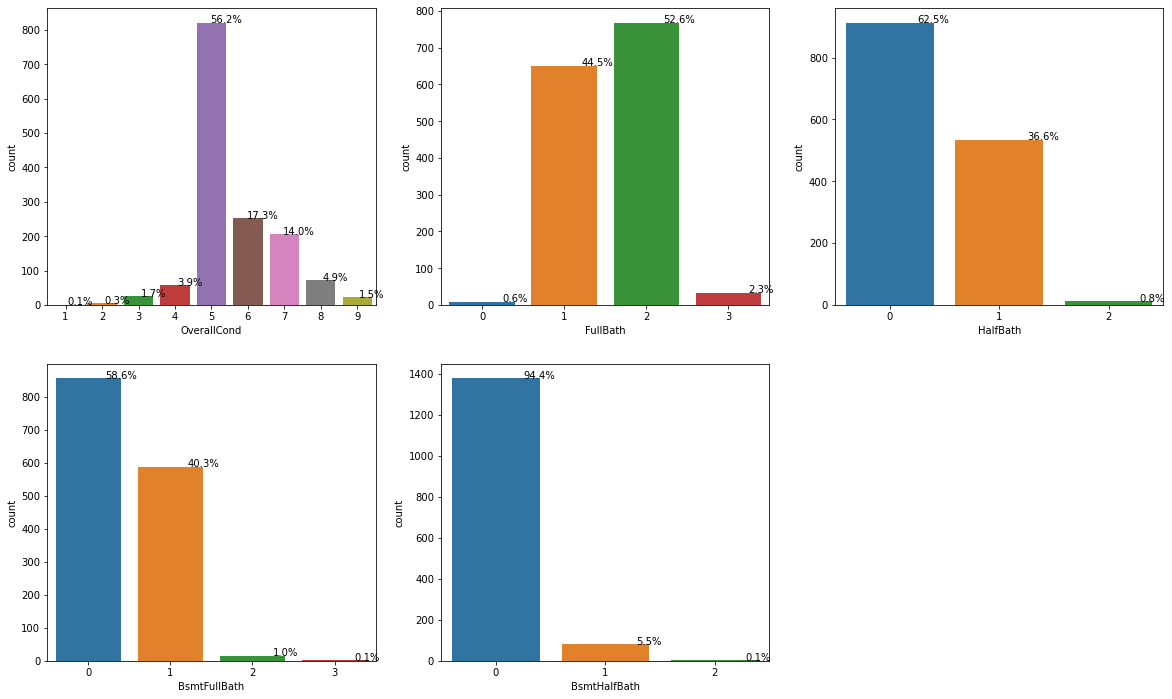

In [84]:
## Checking Skewness in 'OverallCond','FullBath', 'HalfBath', 'BsmtFullBath' and 'BsmtHalfBath'
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['OverallCond'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['FullBath'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['HalfBath'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['BsmtFullBath'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['BsmtHalfBath'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- High skew in BsmtHalfBath, so we will be dropping it.

In [85]:
## dropping  BsmtHalfBath
housing_categorical = housing_categorical.drop(['BsmtHalfBath'],axis = 1)

In [86]:
## Checking columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

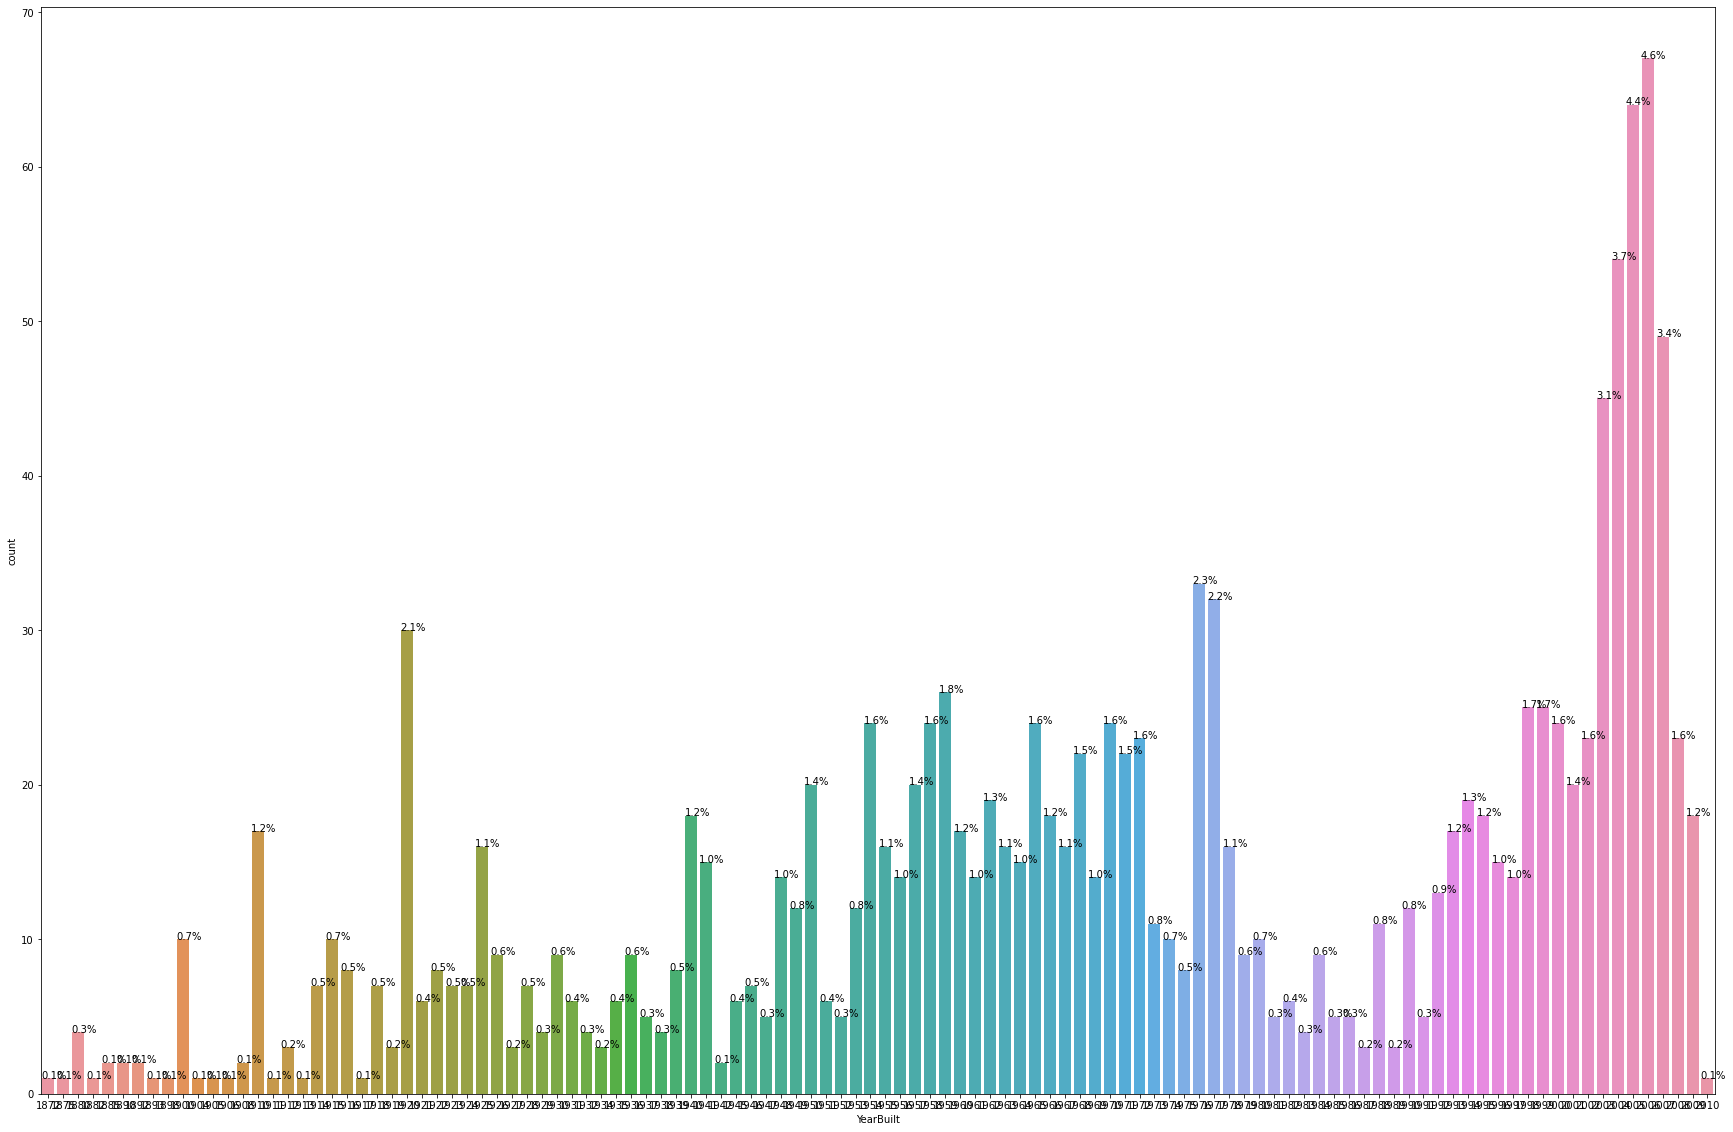

In [87]:
## checking for skewness in YearBuilt
plt.figure(figsize=(30,20))
ax = sns.countplot(x= housing['YearBuilt'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- No skew.

In [88]:
housing['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

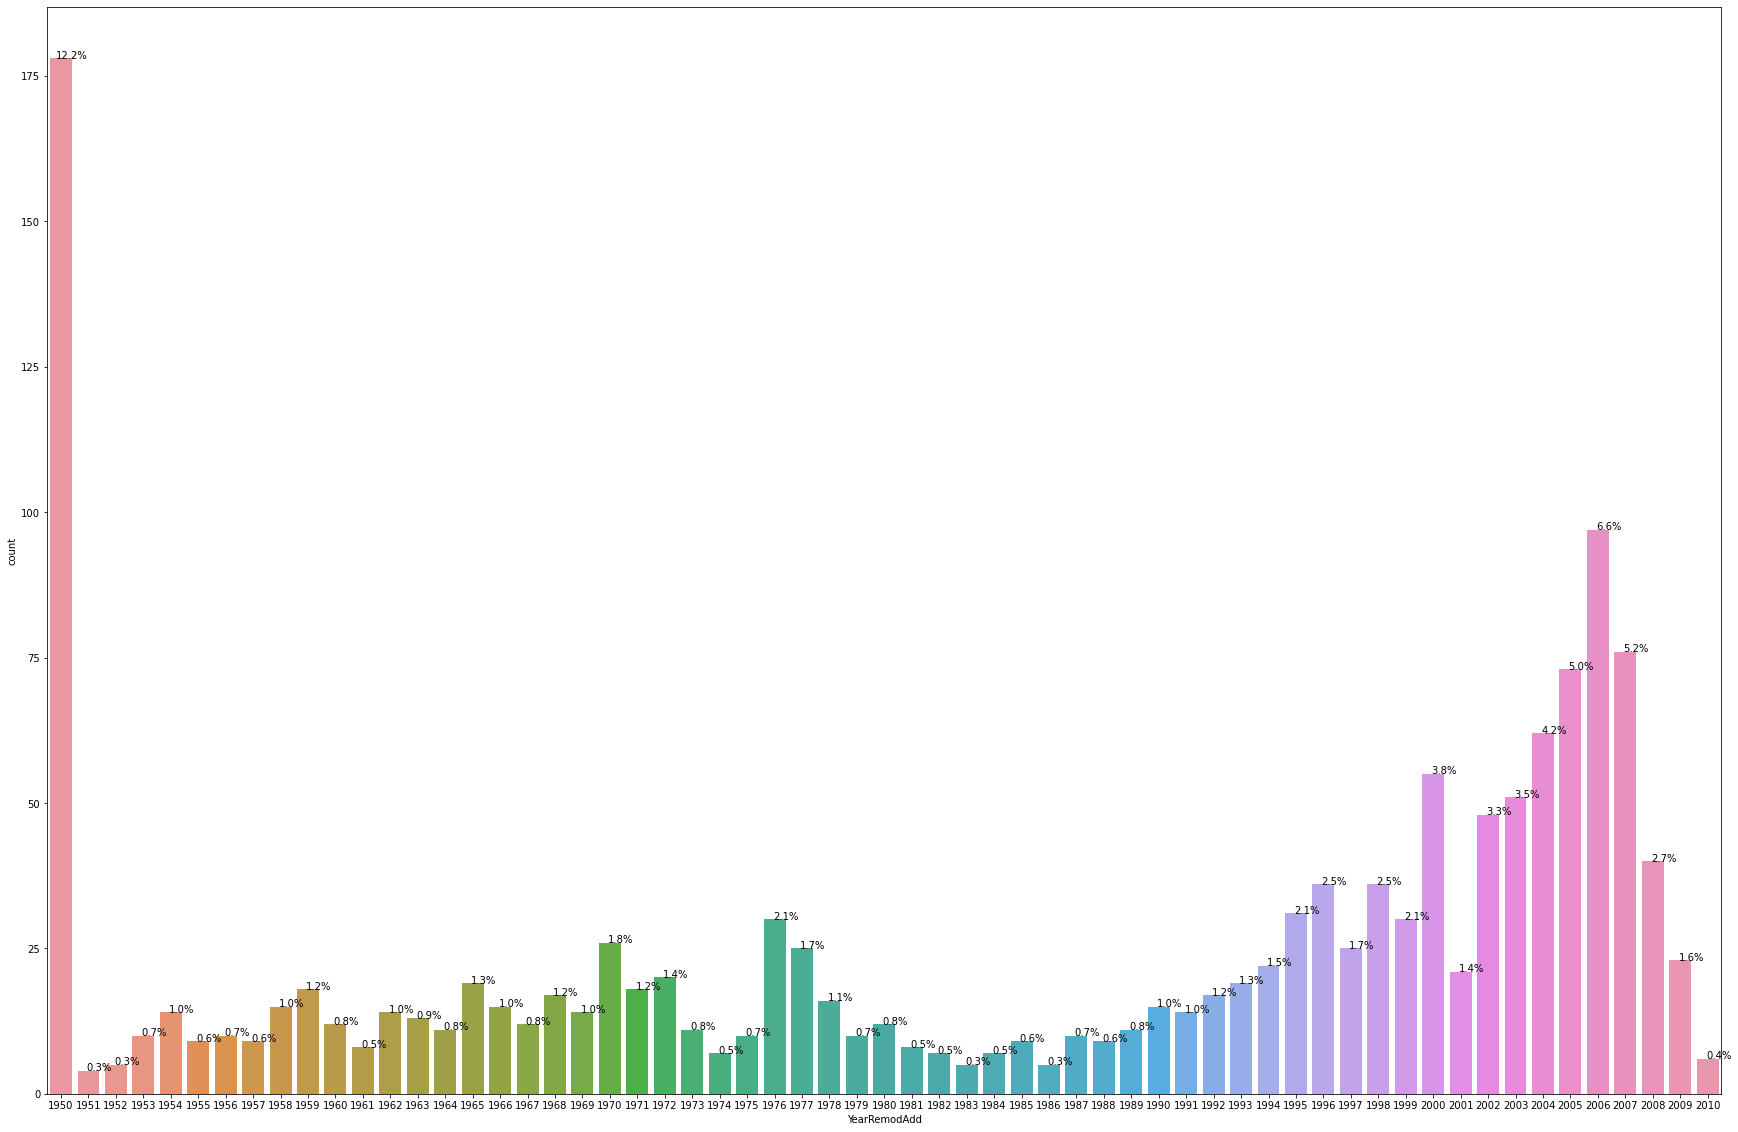

In [89]:
## Checking for Skewness in YearRemodAdd
plt.figure(figsize=(30,20))
ax = sns.countplot(x= housing['YearRemodAdd'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- No skew.

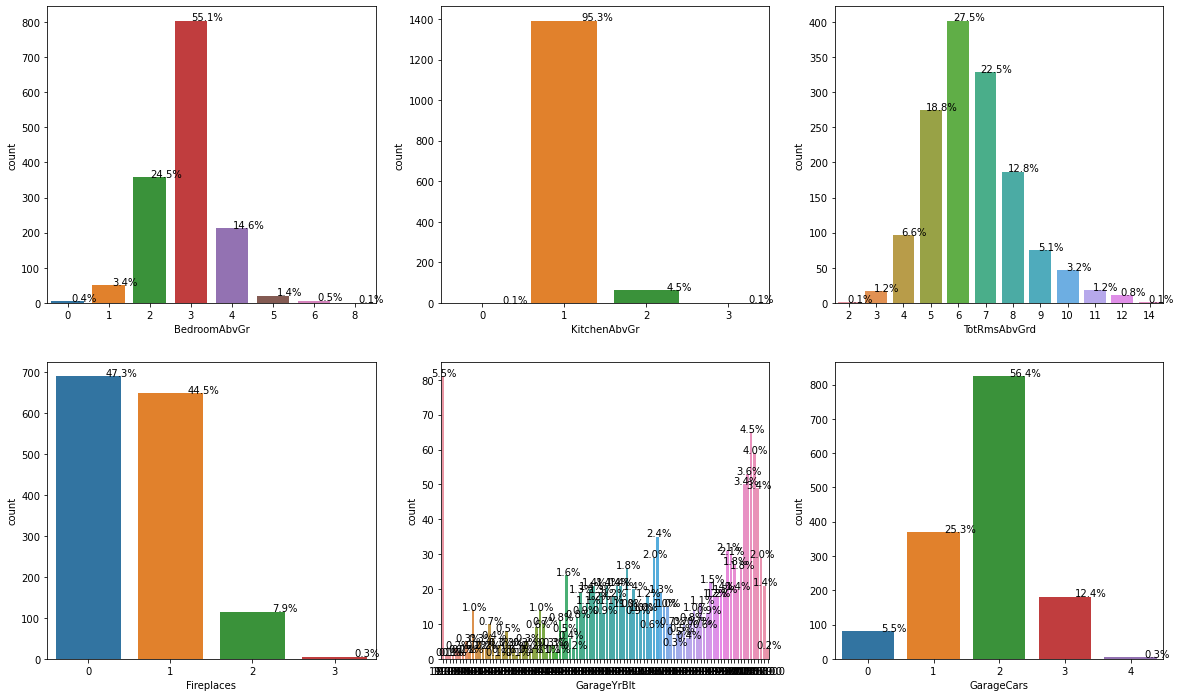

In [90]:
##Checking for skewness in 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars'
      
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
ax = sns.countplot(x= housing['BedroomAbvGr'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,2)
ax = sns.countplot(x= housing['KitchenAbvGr'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,3)
ax = sns.countplot(x= housing['TotRmsAbvGrd'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,4)
ax = sns.countplot(x= housing['Fireplaces'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,5)
ax = sns.countplot(x= housing['GarageYrBlt'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,3,6)
ax = sns.countplot(x= housing['GarageCars'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- KitchenAbvGr shows high skew, we will be removing it.

In [91]:
## Dropping KitchenAbvGr
housing_categorical = housing_categorical.drop(['KitchenAbvGr'],axis=1)

In [92]:
## Checking Columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

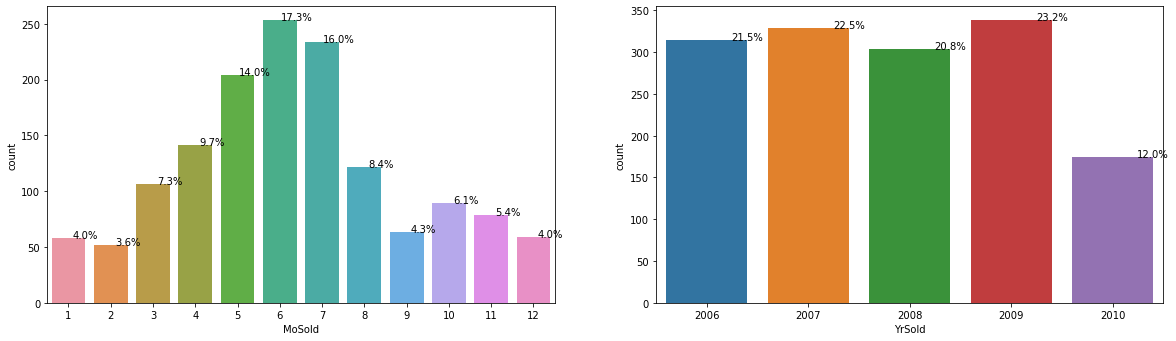

In [93]:
## Checking for Skewness in 'MoSold' and 'YrSold'
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
ax = sns.countplot(x= housing['MoSold'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.subplot(2,2,2)
ax = sns.countplot(x= housing['YrSold'])
total = float(len(housing))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

- No skew.

### The list of categorical columns that we will consider further 

In [94]:
## Columns retained in housing_categorical
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'MoSold', 'YrSold'],
      dtype='object')

In [95]:
## Shape
housing_categorical.shape

(1460, 36)

### Now lets see how these are related to each other and to our target variable SalePrice

In [96]:
## We will use test_df for checking the correlations
## test_df will concatenate housing_categorical with SalePrice
## This will enable us top see the correlations of categorical variables with the SalePrice
test_df = pd.concat([housing_categorical,housing['SalePrice']],axis = 1)

In [97]:
## checking for correlations
test_df.corr()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,MoSold,YrSold,SalePrice
MSSubClass,1.000000,0.032628,-0.059316,0.027850,0.040581,0.003491,0.131608,0.177354,-0.023438,0.040380,-0.045569,-0.080997,-0.040110,-0.013585,-0.021407,-0.084284
OverallQual,0.032628,1.000000,-0.091932,0.572323,0.550684,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.288998,0.600671,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.091932,1.000000,-0.375983,0.073741,-0.054942,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.006515,-0.185758,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.572323,-0.375983,1.000000,0.592855,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.272029,0.537850,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.550684,0.073741,0.592855,1.000000,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.146357,0.420622,0.021490,0.035743,0.507101
BsmtFullBath,0.003491,0.111098,-0.054942,0.187599,0.119470,1.000000,-0.064512,-0.030905,-0.150673,-0.053275,0.137928,0.049270,0.131881,-0.025361,0.067049,0.227122
FullBath,0.131608,0.550600,-0.194149,0.468271,0.439046,-0.064512,1.000000,0.136381,0.363252,0.554784,0.243671,0.137464,0.469672,0.055872,-0.019669,0.560664
HalfBath,0.177354,0.273458,-0.060769,0.242656,0.183331,-0.030905,0.136381,1.000000,0.226651,0.343415,0.203649,0.117166,0.219178,-0.009050,-0.010269,0.284108
BedroomAbvGr,-0.023438,0.101676,0.012980,-0.070651,-0.040581,-0.150673,0.363252,0.226651,1.000000,0.676620,0.107570,-0.009850,0.086106,0.046544,-0.036014,0.168213
TotRmsAbvGrd,0.040380,0.427452,-0.057583,0.095589,0.191740,-0.053275,0.554784,0.343415,0.676620,1.000000,0.326114,0.095607,0.362289,0.036907,-0.034516,0.533723


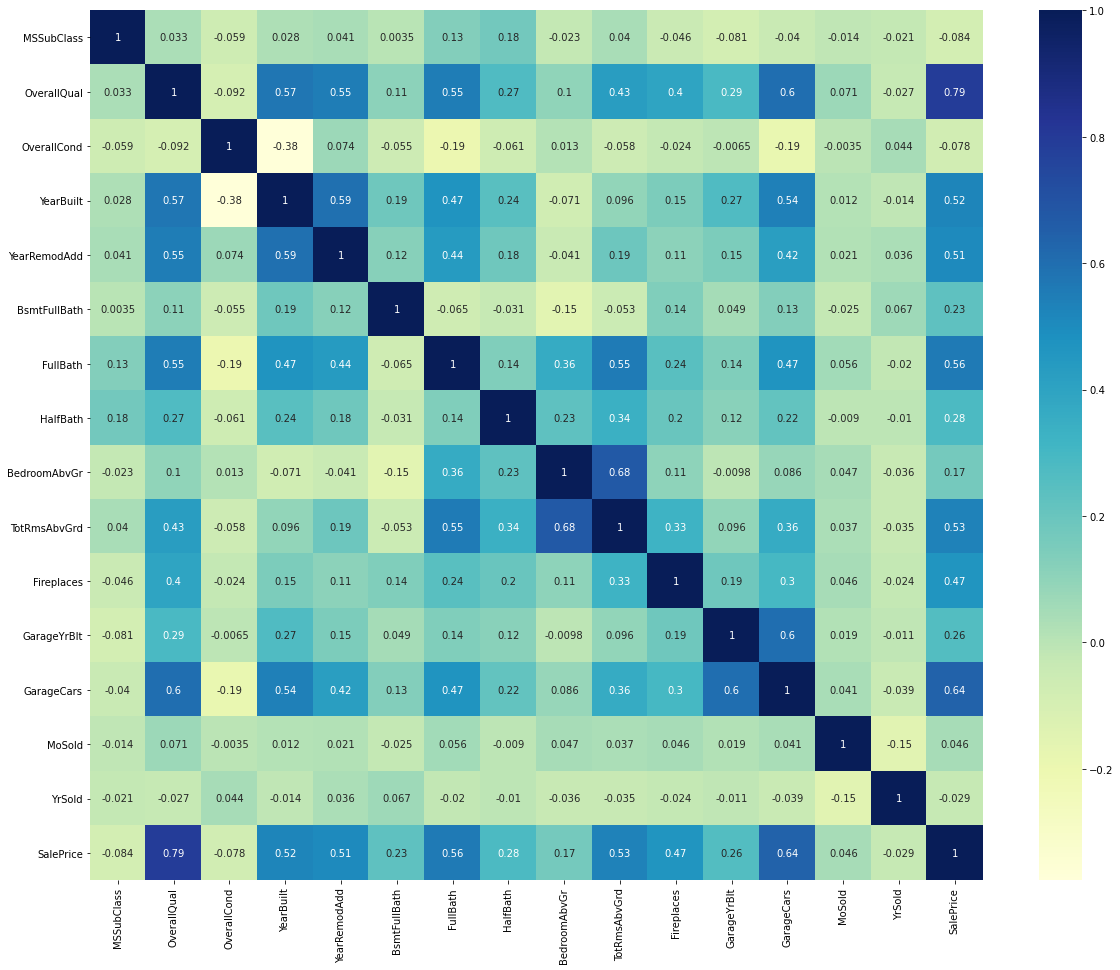

In [98]:
## plotiing heatmap for better visualisation of correlations
plt.figure(figsize=(20,16))
sns.heatmap(test_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

- 'YearBuilt' and 'YearRemodAdd' , are showing a high correlation. From data definition we know that:
   - YearBuilt: Original construction date
   - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- So here, we will go for making a derived column called YrSincRemod which will remove the common values betweew the two and tell us how many years since remodelling has been done.
- WE will drop both and retain the new one.

### Feature Engineering
- We will do two things here:
    - 1. Create a derived column called YrSincRemod which will remove the common values betweew YearBuilt and YearRemodAdd
    - 2. Do a log transformation over the target variable to address the skew issue.

In [99]:
## making new derived column
housing_categorical['YrSincRemod'] = 2010 - ((housing_categorical['YearRemodAdd'] - housing_categorical['YearBuilt']) + housing_categorical['YearBuilt'])

In [100]:
## dropping the redundant columns
housing_categorical = housing_categorical.drop(['YearRemodAdd','YearBuilt'],axis=1)

In [101]:
## checking columns
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold',
       'YrSincRemod'],
      dtype='object')

#### Addressing the skewness in the target variable

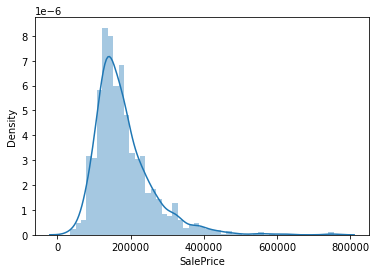

Skewness: 1.907790


In [102]:
sns.distplot(housing_continous['SalePrice'])
plt.show()
print("Skewness: %f" % housing_continous['SalePrice'].skew())

In [103]:
## log transformation on SalePrice
housing_continous['SalePrice'] = np.log1p((housing_continous['SalePrice']))

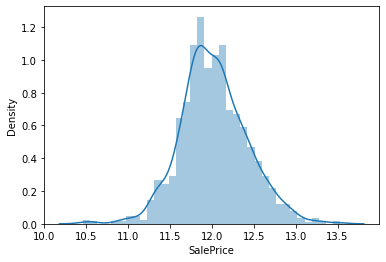

Skewness: 0.138361


In [104]:
sns.distplot(housing_continous['SalePrice'])
plt.show()
print("Skewness: %f" % housing_continous['SalePrice'].skew())

- The skewness in the target variable Saleprice has been drasticaaly reduced from 1.9 to .138.

- So, by feature engineering, we have created a new derived variable YrSincRemod and we have also successfully addressed the high skew issue in the target variable my doing a log transformation.

- Now before we move ahead, let us once again check for correlations among the Independent variables and also their correlation with the target variable and drop some variables if the need arises. 

In [105]:
## Creating new test_df with the transformed value of 'Saleprice'
test_df = pd.concat([housing_categorical,housing_continous['SalePrice']],axis = 1)

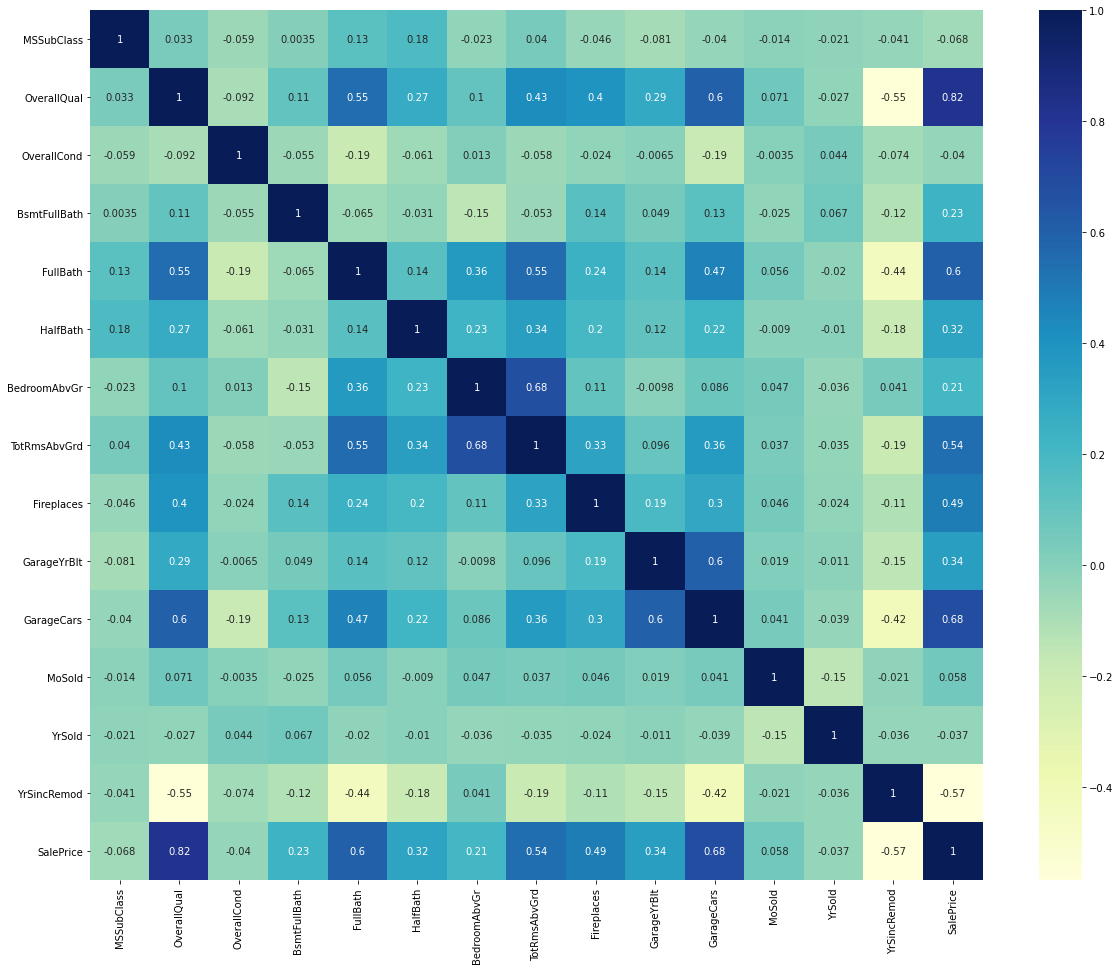

In [106]:
## Creating heatmap to check for correlations
plt.figure(figsize=(20,16))
sns.heatmap(test_df.corr(),cmap='YlGnBu',annot=True)
plt.show()

- None of the independent varaibles show a very high correlation.
- Following columns have a very weak correlation with SalePrice:
  - 'MSSuclass', 'OverallCond','MoSold', 'YoSold'
- WE will be dropping these as they wont contribute muchh to our analysis.

In [107]:
## dropping 'MSSubclass', 'OverallCond','MoSold', 'YoSold'
housing_categorical = housing_categorical.drop(['MSSubClass','OverallCond','MoSold','YrSold'],axis=1)

In [108]:
## Checking columns in housing_categorical
housing_categorical.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition', 'OverallQual', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'YrSincRemod'],
      dtype='object')

In [109]:
## Checking shape of housing_categorical
housing_categorical.shape

(1460, 31)

In [110]:
## Checking columns in housing_continous
housing_continous.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

In [111]:
## Checking shape of housing_continous
housing_continous.shape

(1446, 15)

# III.Data Preperation

### Let's create the dummy variables first

In [112]:
## Creating dummy variables
housing_categorical = pd.get_dummies(housing_categorical,drop_first=True)

In [113]:
## Checking out housing_categorical after one-hot encoding
pd.set_option('display.max_columns',141)
housing_categorical.head()

,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSincRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,1,2,1,3,8,0,2003.0,2,7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,6,0,2,0,3,6,1,1976.0,2,34,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,7,1,2,1,3,6,1,2001.0,2,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,7,1,1,0,3,7,1,1998.0,3,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,8,1,2,1,4,9,1,2000.0,3,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [114]:
## concatenating housing_categorical with housing_continous to make housing_final
housing_final = pd.concat([housing_continous,housing_categorical],axis=1)

In [115]:
## Checking out housing_final
housing_final.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSincRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,...,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706.0,150.0,856.0,854.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,12.247699,7,1,2,1,3,8,0,2003.0,2,7,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,0.0,978.0,284.0,1262.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,12.109016,6,0,2,0,3,6,1,1976.0,2,34,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,162.0,486.0,434.0,920.0,866.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,12.317171,7,1,2,1,3,6,1,2001.0,2,8,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,0.0,216.0,540.0,756.0,756.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,11.849405,7,1,1,0,3,7,1,1998.0,3,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,350.0,655.0,490.0,1145.0,1053.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,12.429220,8,1,2,1,4,9,1,2000.0,3,10,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [116]:
## checking shape of housing_final
housing_final.shape

(1460, 156)

- Now we have a database with all numeric values which can be fed into the models.

## Creating X and y labels

In [117]:
## Creating y lable
y = housing_final.pop('SalePrice')

In [118]:
## Creating X label
X = housing_final

### Scaling the dataset as we have to scale before feeding into Ridge and Lasso Regression Models.

In [119]:
## importing libraries
from sklearn.preprocessing import StandardScaler

In [120]:
## instantiating object
scaler = StandardScaler()

In [121]:
## storing column names as scaling using MinMaxScaler converts dataframe into an array
X_cols = X.columns

In [122]:
## implementing scaling
X = pd.DataFrame(scaler.fit_transform(X))

In [123]:
## reassigning column names
X.columns = X_cols

In [124]:
X.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSincRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.222871,-0.290670,0.520098,0.617011,-0.947013,-0.471910,1.167357,0.390087,0.355354,-0.754564,0.217111,-0.360135,-0.270238,-0.155851,0.651479,1.107810,0.789741,1.227585,0.163779,0.912210,-0.951226,0.296026,0.311725,-0.878668,-0.215859,-0.105263,0.518133,-0.418955,-0.169981,-0.083045,0.760512,-0.262324,-0.182380,-0.052414,0.622762,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.098397,-0.994535,-0.074227,-0.087129,1.510265,-0.16125,-0.215859,0.528753,-0.087129,-0.49357,-0.069409,...,-0.045376,-0.069409,-0.131991,-0.02618,-0.20702,-0.406452,-0.083045,-0.414427,-0.02618,-0.328236,-0.058621,-0.134652,1.377253,-0.39494,-0.163471,1.510265,-1.217782,-0.309994,-0.098397,1.411313,-1.278819,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.156721,1.167244,-0.16125,-0.894565,-0.317893,-0.291025,0.729386,-0.163471,-0.335864,1.578868,-0.231065,-0.16125,-0.316585,-0.646124,-0.186352,-0.444638,-0.02618,-0.643994,-0.165667,1.221257,-1.006873,-0.152071,-0.593171,1.056382,-0.117851,-0.522385,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.195977,-0.347118,-0.087129,0.488198,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,0.524282,-0.079896,-0.570023,1.242951,-0.644261,0.501790,-0.794291,-0.483508,-0.058727,1.641973,-0.705450,-0.360135,-0.270238,-0.155851,-0.071836,-0.819964,0.789741,-0.761621,0.163779,-0.318683,0.600495,0.236495,0.311725,0.429577,-0.215859,-0.105263,0.518133,-0.418955,-0.169981,-0.083045,0.760512,-0.262324,5.4830

### Splitting the dataset into train and test

In [125]:
## importing libraries
from sklearn.model_selection import train_test_split

In [126]:
## splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## checking out the  resultant datasets

In [127]:
## checking out the dimensions of the resultant datasets
print('X_train shape:',X_train.shape)
print(type(X_train))
print('X_test shape:',X_test.shape)
print(type(X_test))
print('y_train shape:',y_train.shape)
print(type(y_train))
print('y_test shape:',y_test.shape)
print(type(y_test))

X_train shape: (1021, 155)
<class 'pandas.core.frame.DataFrame'>
X_test shape: (438, 155)
<class 'pandas.core.frame.DataFrame'>
y_train shape: (1021,)
<class 'pandas.core.series.Series'>
y_test shape: (438,)
<class 'pandas.core.series.Series'>


In [128]:
## checking out the spread of y_train
y_train.describe()

count    1011.000000
mean       12.021404
std         0.395251
min        10.460271
25%        11.769510
50%        11.982935
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [129]:
y_train

210     11.492733
318     12.468441
239     11.635152
986     11.669938
1416    11.715874
          ...    
1009    11.532738
802     12.149508
53      12.861001
350     12.670002
79      11.608245
Name: SalePrice, Length: 1021, dtype: float64

In [130]:
## checking out the spread of X_train
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSincRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0000

In [131]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,OverallQual,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,YrSincRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,...,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.123251,-0.812289,-0.570023,0.069313,-0.391214,-0.452724,-0.794291,-1.259604,-2.223244,-0.754564,-0.705450,1.206636,-0.270238,-0.155851,-0.795151,1.107810,-1.026041,-0.761621,-1.062465,-0.934130,-0.951226,-4.120324,-2.365440,1.689368,-0.215859,-0.105263,0.518133,-0.418955,-0.169981,-0.083045,0.760512,-0.262324,-0.18238,-0.052414,0.622762,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,3.687818,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.098397,1.005495,-0.074227,-0.087129,-0.662136,-0.16125,-0.215859,0.528753,-0.087129,-0.493570,-0.069409,...,-0.045376,-0.069409,-0.131991,-0.02618,-0.20702,-0.406452,-0.083045,-0.414427,-0.02618,-0.328236,-0.058621,7.426564,-0.726083,-0.39494,-0.163471,-0.662136,0.821165,-0.309994,-0.098397,-0.708560,0.781971,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.156721,-0.856719,-0.16125,1.117862,-0.317893,-0.291025,0.729386,-0.163471,-0.335864,-0.633365,-0.231065,-0.16125,3.158709,-0.646124,-0.186352,-0.444638,-0.02618,1.552809,-0.165667,-0.818829,0.993174,-0.152071,-0.593171,1.056382,-0.117851,-0.522385,-1.214321,-0.114827,-0.253259,-0.078757,-0.600559,4.126099,4.126099,-0.637614,-0.841191,-0.195977,-0.347118,-0.087129,0.488198,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
318,1.022383,-0.024911,0.853808,1.263662,-0.472550,0.705644,2.132102,2.215276,0.863545,1.979739,0.201987,1.990022,-0.270238,-0.155851,0.651479,1.107810,0.789741,1.227585,1.390023,1.527656,0.600495,0.273977,1.650307,-0.394133,-0.215859,-0.105263,0.518133,-0.418955,-0.169981,-0.083045,0.760512,-0.262324,

### Now before we move ahead we have to check for any null values that may have crept in beacuse of the EDA process.
- We will find these and take appropriate acctions

In [132]:
## checking null values in X_train
np.where(np.isnan(X_train))

(array([ 44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,  44,
         44, 219, 219, 219, 219, 219, 219, 219, 219, 219, 219, 219, 219,
        219, 219, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223,
        223, 223, 223, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392,
        392, 392, 392, 392, 541, 541, 541, 541, 541, 541, 541, 541, 541,
        541, 541, 541, 541, 541, 611, 611, 611, 611, 611, 611, 611, 611,
        611, 611, 611, 611, 611, 611, 725, 725, 725, 725, 725, 725, 725,
        725, 725, 725, 725, 725, 725, 725, 840, 840, 840, 840, 840, 840,
        840, 840, 840, 840, 840, 840, 840, 840, 846, 846, 846, 846, 846,
        846, 846, 846, 846, 846, 846, 846, 846, 846, 889, 889, 889, 889,
        889, 889, 889, 889, 889, 889, 889, 889, 889, 889]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4

In [133]:
## checking null values in X_train
np.where(np.isnan(y_train))

(array([ 44, 219, 223, 392, 541, 611, 725, 840, 846, 889]),)

In [134]:
## dropping the null values
X_train = X_train.dropna()

In [135]:
## again checking for null values
np.where(np.isnan(X_train))

(array([], dtype=int64), array([], dtype=int64))

- No null values in X_train

In [136]:
## checking shape of X_train
X_train.shape

(1011, 155)

In [137]:
## dropping null values from y_train
y_train = y_train.dropna()

In [138]:
## dropping null values from X_test
X_test = X_test.dropna()

In [139]:
## dropping null values from y_test
y_test = y_test.dropna()

- Now that we have scaled the cleaned the dataset and prepared it, lets move towards model building.
- We will be building three models, namely:
   - Linear Regression
   - Ridge Regresssion
   - Lasso Regresssion
- And finally we will compare the three to choose the best model to be used.

# IV. Model Building and Evaluation  

## Building Linear Regression Model
- WE will be using SKlearn to build the model

In [140]:
## importing libraries
from sklearn.linear_model import LinearRegression

In [141]:
# Building the Linear regression model

## instantiating the object 
lr = LinearRegression()
## fitting X_train and y_train into the linear model
lr.fit(X_train,y_train)

LinearRegression()

In [142]:
## making predictions
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [143]:
## getting model coefficients
print('Intercept:',lr.intercept_)
print('Betas:',lr.coef_)

Intercept: 100946417029.30338
Betas: [ 4.94202162e-03  1.28920973e-02 -3.60281756e-03  1.73744080e-02
  1.12212587e-04  4.45863007e-02  2.55310453e-02  6.80910500e-02
  4.03747063e-02  1.65546132e-02 -1.40839197e-03  3.47184794e-03
  1.03506566e-02 -3.61747041e-04  7.54265166e-02  9.67297617e-03
  9.01653838e-03  1.14198358e-02  1.30828588e-02  1.27313452e-02
  1.17455757e-02  1.54360513e-01 -1.92814830e-03 -3.99233185e-02
  8.96269165e-02  4.41724400e-02  1.81352826e-01  1.43882114e-01
  4.65294567e-03 -1.48575323e-03  2.51153170e-03  8.38757620e-03
 -8.93625099e-03 -8.09226138e-04 -1.44354974e-03  4.17104824e-04
 -7.98313760e-03  1.66603620e-02  9.32774631e-03  1.43186629e-02
  3.72704748e-02 -1.02579642e-02  1.18833670e-02  3.61566593e-03
 -1.20871949e-02  1.97830367e-03  8.70400475e-03 -3.79618963e-03
  6.27160377e-03  2.24481977e-02  2.86717787e-02 -1.09830098e-03
  1.03934180e-02 -5.41223190e-04  8.32893468e-03  3.04270815e-02
  1.99534246e-02  5.70464572e-03  1.18430248e-02 -1.1

### Model Metrics: For both train and test
- We well be looking at the following metrics
- RSS
- R-Squared: r2 score
- MSE

In [144]:
## importing libraries
from sklearn.metrics import r2_score,mean_squared_error

- Since we will be comparing the metircs of different models, so for each model we will maintain a list containing all these metrics.

In [145]:
## creating metrics list as metrics_lr
metric_lr = []
## calculating r2 score: R-Squared = 1 - RSS/TSS
r2_train_lr = r2_score(y_train,y_train_pred_lr)
metric_lr.append(r2_train_lr)
r2_test_lr = r2_score(y_test,y_test_pred_lr)
metric_lr.append(r2_test_lr)
print('r2_train_lr:',r2_train_lr)
print('r2_test_lr:',r2_test_lr)

r2_train_lr: 0.924207985009202
r2_test_lr: -1.4500935653821727e+26


- Substantial diffence between the r2 scores foe train and test data, that means linear model is not ideal for this dataset.

In [146]:
## calculating RSS: RSS = 𝛴(y  - y_pred)²
RSS_train_lr = np.sum(np.square(y_train - y_train_pred_lr))
metric_lr.append(RSS_train_lr)
RSS_test_lr = np.sum(np.square(y_test - y_test_pred_lr))
metric_lr.append(RSS_test_lr)
print('RSS_train_lr:',RSS_train_lr)
print('RSS_test_lr:',RSS_test_lr)

RSS_train_lr: 11.958878045252415
RSS_test_lr: 1.0337880821248917e+28


In [147]:
## Calculating MSE: MSE=RSS/N
MSE_train_lr = mean_squared_error(y_train, y_train_pred_lr)
metric_lr.append(MSE_train_lr)
MSE_test_lr = mean_squared_error(y_test, y_test_pred_lr)
metric_lr.append(MSE_test_lr)
print('MSE_train_lr:',MSE_train_lr)
print('MSE_test_lr:',MSE_test_lr)

MSE_train_lr: 0.011828761666916337
MSE_test_lr: 2.382000189227861e+25


In [148]:
## checking the metrics list
metric_lr

[0.924207985009202,
 -1.4500935653821727e+26,
 11.958878045252415,
 1.0337880821248917e+28,
 0.011828761666916337,
 2.382000189227861e+25]

- As we can see none of the metrics between the train and test predictions are matching, so we can say that the linear model is not able to capture the data variance well.
- Now either we can go to a higher degree model or we can go for regularization, as regularixation affords us to make a model in the linear framework
- So we will go for regularisation and try Ridge and Lasso Regression.

## Ridge Regression

### First we create a  dictionary of alphas(lambdas) to tune 
### This is critical because, if the value  of   alpha(lambda) is too high it will lead to underfitting and if it is too low, it will not handle the overfitting.

In [149]:
## making a dictionary called params to hold all the values of alpha
## for hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20,50,100,500,1000]}

In [150]:
## importing libraries
from sklearn.linear_model import Ridge

In [151]:
## instantiating model object
ridge = Ridge()

- Since we have 28 values of `alpha(lambda)`, we need to find the best alpha
- Making 28 models for each alpha and visualisng them to compare and select the best model for a given alpha(lambda) would be too cumbersome!
- So, we use `cross-validation` using `GridSearchCV`  to find the best value of `alpha(lambda)`
- What `GridSearchCV` does is that for a given model( fed into it as estimator), it will build all the models in the background for all the values of alphas and give the alpha corresponding to the best model based on some parameter, for eg we have chosen `r2 score` as that parameter for our models here.

### Going for GridSearchCV to find the best value of Alpha(Lambda)

In [152]:
## importing libraries
from sklearn.model_selection import GridSearchCV

In [153]:
## making a grid search
from sklearn.model_selection import KFold
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)

In [154]:
## fitting X_train and y_train into model_cv
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [155]:
## Creating a dataframe containing the results of GridSearchCV for our given model
## We are doing this because we want to check visually as well the best value of alpha
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004392,0.001009,0.002733,0.000490,0.0001,{'alpha': 0.0001},0.890455,0.898286,0.803197,0.901131,0.892313,0.877076,0.037142,26,0.926167,0.925926,0.943654,0.923455,0.923095,0.928460,0.007699
1,0.003865,0.000387,0.002434,0.000336,0.0010,{'alpha': 0.001},0.890456,0.898286,0.803198,0.901133,0.892316,0.877078,0.037143,25,0.926167,0.925926,0.943654,0.923455,0.923095,0.928460,0.007699
2,0.004134,0.000637,0.002345,0.000287,0.0100,{'alpha': 0.01},0.890470,0.898287,0.803209,0.901157,0.892340,0.877092,0.037144,24,0.926167,0.925926,0.943654,0.923455,0.923095,0.928459,0.007699
3,0.004326,0.000785,0.002613,0.000418,0.0500,{'alpha': 0.05},0.890532,0.898295,0.803258,0.901244,0.892445,0.877155,0.037150,23,0.926167,0.925925,0.943652,0.923451,0.923093,0.928458,0.007699
4,0.004027,0.000769,0.002742,0.000553,0.1000,{'alpha': 0.1},0.890615,0.898312,0.803321,0.901327,0.892572,0.877229,0.037154,22,0.926166,0.925924,0.943647,0.923441,0.923088,0.928453,0.007699


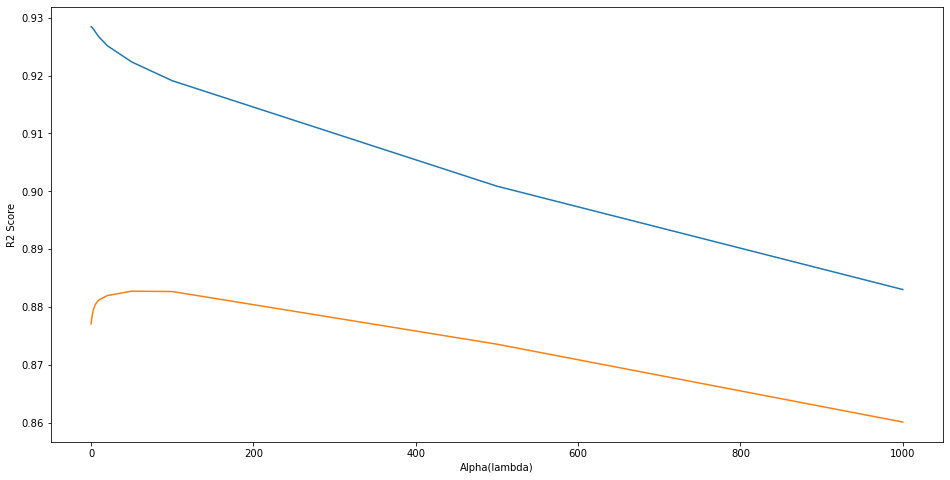

In [156]:
## plotting r2 score between the train and test data
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha(lambda)')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

- The plot shows r2 test peaking at about alpha=50 and after that it follows the r2 train
- So the best alpha for the model should be around 50.
- let's see if that is the case

In [157]:
## getting the best value for alpha
print('The best value of Alpha:',model_cv.best_params_)

The best value of Alpha: {'alpha': 50}


### Building the ridge model for the best value of Alpha as returned by GridSearchCV

In [158]:
## Building the ridge model for alpha=50
ridge = Ridge(alpha=50)
ridge.fit(X_train,y_train)

Ridge(alpha=50)

In [159]:
## making predictions
y_ridge_pred_train = ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)

In [160]:
## getting coefficients 
ridge_betas = ridge.coef_
print(ridge_betas)

[ 0.00853166  0.01422842 -0.00086298  0.02200955  0.00338233  0.04206053
  0.02118052  0.05705781  0.03164908  0.01587125  0.00013925  0.00083586
  0.00999216  0.0002247   0.07491146  0.01258258  0.01296081  0.01442661
  0.01349668  0.0149812   0.01392176  0.00541994  0.00602609 -0.04095646
  0.01824791  0.00995667  0.04164399  0.02700935  0.00426999 -0.00294278
  0.00014803  0.00951348 -0.00914146 -0.00197836 -0.00241746 -0.00101262
 -0.01130953  0.0057722   0.00623849  0.00350899  0.02823292 -0.01780523
  0.00128922 -0.0137758  -0.01597555 -0.00483013 -0.00287029 -0.00364071
  0.0005109   0.01582865  0.02027529 -0.01577273  0.00426342 -0.00801737
  0.00108727  0.02183506  0.01484606  0.00020444  0.00809171 -0.00105774
 -0.0062844  -0.00315163  0.00068982 -0.01116225 -0.00268547 -0.00039413
 -0.0084505  -0.00347326 -0.00463226  0.00038263  0.00577966  0.00068603
 -0.01018647  0.02242038  0.00024768  0.0003345   0.00661294  0.00110702
  0.00211878  0.00443715  0.00721771  0.00964659  0

In [161]:
##Creating ridge_df to contain all coeffcients in descending order
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df.sort_values(by=['Coefficient'],inplace=True,ascending=False)
ridge_df

,Features,Coefficient
14,OverallQual,0.0749
7,GrLivArea,0.0571
5,TotalBsmtSF,0.0421
26,MSZoning_RL,0.0416
8,GarageArea,0.0316
...,...,...
124,BsmtFinType1_Unf,-0.0190
112,BsmtQual_Gd,-0.0215
114,BsmtQual_TA,-0.0229
131,KitchenQual_TA,-0.0242


In [162]:
## Creating a dataframe ridge_top_10 of top 10 features of the model
ridge_top_10 = ridge_df.head(10)
ridge_top_10

,Features,Coefficient
14,OverallQual,0.0749
7,GrLivArea,0.0571
5,TotalBsmtSF,0.0421
26,MSZoning_RL,0.0416
8,GarageArea,0.0316
40,Neighborhood_Crawfor,0.0282
27,MSZoning_RM,0.0270
154,SaleCondition_Partial,0.0262
153,SaleCondition_Normal,0.0233
73,Exterior1st_BrkFace,0.0224


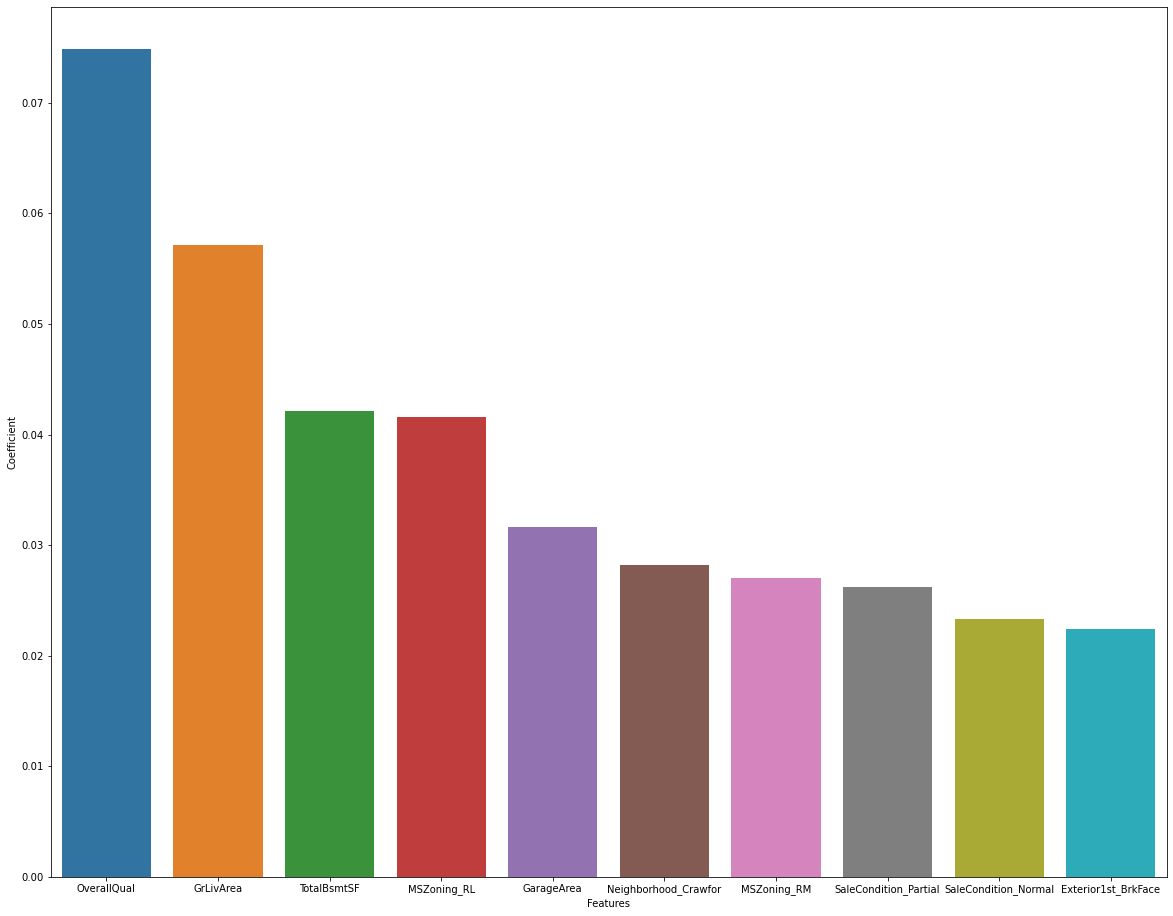

In [163]:
## creating a barplot of ridge_top_10 for better visual represtation
plt.figure(figsize=(20,16))
sns.barplot(x='Features',y='Coefficient',data = ridge_top_10 )
plt.show()

### Model Metrics: For both train and test
- We well be looking at the following metrics
- RSS
- R-Squared: r2 score
- MSE
- We will store these values in a list metric2

In [164]:
## creating metrics list as metric2
metric2 = []
## calculating r2 score: R-Squared = 1 - RSS/TSS
r2_train_ridge = r2_score(y_train,y_ridge_pred_train)
metric2.append(r2_train_ridge)
r2_test_ridge = r2_score(y_test,y_ridge_pred_test)
metric2.append(r2_test_ridge)
print('r2_train:',r2_train_ridge)
print('r2_test:',r2_test_ridge)

r2_train: 0.9194710981783326
r2_test: 0.8848017375950764


In [165]:
## calculating RSS: RSS = 𝛴(y  - y_pred)²
RSS_train_ridge = np.sum(np.square(y_train - y_ridge_pred_train))
metric2.append(RSS_train_ridge)
RSS_test_ridge = np.sum(np.square(y_test - y_ridge_pred_test))
metric2.append(RSS_test_ridge)
print('RSS_train:',RSS_train_ridge)
print('RSS_test:',RSS_test_ridge)

RSS_train: 12.706289918804082
RSS_test: 8.21261424771026


In [166]:
## Calculating MSE: MSE=RSS/N
MSE_train_ridge = mean_squared_error(y_train,y_ridge_pred_train)
metric2.append(MSE_train_ridge)
MSE_test_ridge = mean_squared_error(y_test,y_ridge_pred_test)
metric2.append(MSE_test_ridge)
print('MSE_train:',MSE_train_ridge)
print('MSE_test:',MSE_test_ridge)

MSE_train: 0.012568041462714225
MSE_test: 0.01892307430347986


### To answer  question 1 from the assingment
### Making the ridge model with alpha=100 that is double of 50

In [167]:
## Building the ridge model for alpha=100
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train,y_train)
## making predcitions
y_ridge100_pred_train = ridge100.predict(X_train)
y_ridge100_pred_test = ridge100.predict(X_test)
##Creating ridge100_df to contain all coeffcients 
ridge100_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge100.coef_.round(4)})
ridge100_df.reset_index(drop=True, inplace=True)
ridge100_df.sort_values(by=['Coefficient'],inplace=True,ascending=False)

In [168]:
## top 10 features for ridge100
ridge100_top_10 = ridge100_df.head(10)
ridge100_top_10

,Features,Coefficient
14,OverallQual,0.0700
7,GrLivArea,0.0524
5,TotalBsmtSF,0.0403
8,GarageArea,0.0289
26,MSZoning_RL,0.0267
40,Neighborhood_Crawfor,0.0263
154,SaleCondition_Partial,0.0237
3,BsmtFinSF1,0.0234
153,SaleCondition_Normal,0.0203
50,Neighborhood_NridgHt,0.0190


In [169]:
## calculating r2 score: R-Squared = 1 - RSS/TSS
r2_train_ridge100 = r2_score(y_train,y_ridge100_pred_train)
r2_test_ridge100 = r2_score(y_test,y_ridge100_pred_test)
print('r2_train100:',r2_train_ridge100)
print('r2_test100:',r2_test_ridge100)
## calculating RSS: RSS = 𝛴(y  - y_pred)²
RSS_train_ridge100 = np.sum(np.square(y_train - y_ridge100_pred_train))
RSS_test_ridge100 = np.sum(np.square(y_test - y_ridge100_pred_test))
print('RSS_train100:',RSS_train_ridge)
print('RSS_test100:',RSS_test_ridge)
## Calculating MSE: MSE=RSS/N
MSE_train_ridge100 = mean_squared_error(y_train,y_ridge100_pred_train)
MSE_test_ridge100 = mean_squared_error(y_test,y_ridge100_pred_test)
print('MSE_train100:',MSE_train_ridge)
print('MSE_test100:',MSE_test_ridge)

r2_train100: 0.9167835987876092
r2_test100: 0.8837851284272086
RSS_train100: 12.706289918804082
RSS_test100: 8.21261424771026
MSE_train100: 0.012568041462714225
MSE_test100: 0.01892307430347986


## Lasso Regression
- Here also we will use Sklearn to build the model

In [170]:
## importing libraries
from sklearn.linear_model import Lasso
## Instantiaitng object
lasso = Lasso()

### Going for GridSearchCV to get the best value of Alpha

In [171]:
## making a grid search
folds = 5
model_cv_lasso = GridSearchCV(estimator=lasso,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)

In [172]:
## fitting X_train and y_train into model_cv_lasso
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [173]:
## Creating a dataframe containing the results of GridSearchCV for our given model
## We are doing this because we want to check visually as well the best value of alpha
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004392,0.001009,0.002733,0.000490,0.0001,{'alpha': 0.0001},0.890455,0.898286,0.803197,0.901131,0.892313,0.877076,0.037142,26,0.926167,0.925926,0.943654,0.923455,0.923095,0.928460,0.007699
1,0.003865,0.000387,0.002434,0.000336,0.0010,{'alpha': 0.001},0.890456,0.898286,0.803198,0.901133,0.892316,0.877078,0.037143,25,0.926167,0.925926,0.943654,0.923455,0.923095,0.928460,0.007699
2,0.004134,0.000637,0.002345,0.000287,0.0100,{'alpha': 0.01},0.890470,0.898287,0.803209,0.901157,0.892340,0.877092,0.037144,24,0.926167,0.925926,0.943654,0.923455,0.923095,0.928459,0.007699
3,0.004326,0.000785,0.002613,0.000418,0.0500,{'alpha': 0.05},0.890532,0.898295,0.803258,0.901244,0.892445,0.877155,0.037150,23,0.926167,0.925925,0.943652,0.923451,0.923093,0.928458,0.007699
4,0.004027,0.000769,0.002742,0.000553,0.1000,{'alpha': 0.1},0.890615,0.898312,0.803321,0.901327,0.892572,0.877229,0.037154,22,0.926166,0.925924,0.943647,0.923441,0.923088,0.928453,0.007699


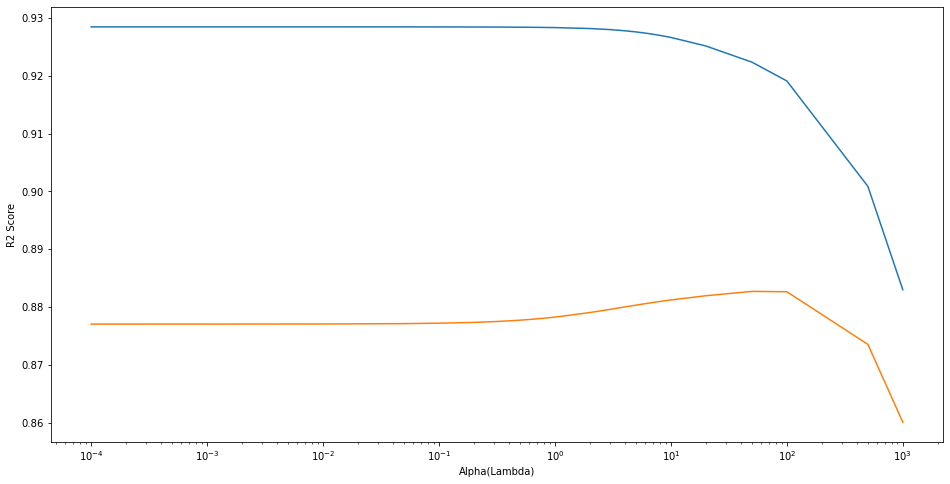

In [174]:
## plotting train and test r2 score against aplha
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha(Lambda)')
plt.show()

- The plot shows r2 test peaking at about alpha=.001 and after that it follows the r2 train
- So the best alpha for the model should be around .001.
- let's see if that is the case.

In [175]:
## getting the best value for alpha
print('The best value of Alpha:',model_cv_lasso.best_params_)

The best value of Alpha: {'alpha': 0.001}


### Creating lasso model for alpha=.001

In [176]:
## instantiating object
lasso = Lasso(alpha = .001)
## fitting X_train and y_traion into the object
lasso.fit(X_train,y_train)

Lasso(alpha=0.001)

In [177]:
## making predictions
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

In [178]:
## Getting coefficients
lasso.coef_

array([ 7.87882488e-03,  1.24455571e-02, -0.00000000e+00,  2.02329116e-02,
       -0.00000000e+00,  4.11757447e-02,  1.49409393e-02,  7.58380177e-02,
        3.61264396e-02,  1.52820886e-02, -0.00000000e+00, -0.00000000e+00,
        9.02137249e-03,  0.00000000e+00,  8.71568359e-02,  1.22513908e-02,
        7.22692864e-03,  1.29457060e-02,  1.28953142e-02,  9.29263842e-03,
        1.38256603e-02,  1.00652210e-02,  2.85868942e-04, -4.40852973e-02,
        3.91731058e-02,  1.97320124e-02,  8.54450750e-02,  5.92010166e-02,
        3.34618977e-03, -1.36942730e-03, -0.00000000e+00,  9.83777349e-03,
       -5.82736127e-03, -1.86464670e-04, -6.12911622e-04, -0.00000000e+00,
       -1.02825305e-02,  5.36902277e-03,  6.90249878e-03,  1.17390951e-03,
        2.66711105e-02, -1.77286101e-02,  7.22130703e-04, -9.22875695e-03,
       -1.35600881e-02, -3.72502867e-03, -4.24929194e-03, -1.80741567e-03,
       -0.00000000e+00,  1.26977399e-02,  1.69789224e-02, -1.37160394e-02,
        2.09167585e-03, -

In [179]:
##Creating lasso_df to contain all coeffcients in descending order
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by=['Coefficient'],inplace=True,ascending=False)
lasso_df

,Features,Coefficient
14,OverallQual,0.0872
26,MSZoning_RL,0.0854
7,GrLivArea,0.0758
27,MSZoning_RM,0.0592
5,TotalBsmtSF,0.0412
...,...,...
112,BsmtQual_Gd,-0.0170
41,Neighborhood_Edwards,-0.0177
114,BsmtQual_TA,-0.0181
131,KitchenQual_TA,-0.0204


In [180]:
## Creating a dataframe lasso_top_10 of top 10 features returned by the lasso model
lasso_top_10 = lasso_df.head(10)
lasso_top_10

,Features,Coefficient
14,OverallQual,0.0872
26,MSZoning_RL,0.0854
7,GrLivArea,0.0758
27,MSZoning_RM,0.0592
5,TotalBsmtSF,0.0412
24,MSZoning_FV,0.0392
8,GarageArea,0.0361
40,Neighborhood_Crawfor,0.0267
154,SaleCondition_Partial,0.0265
153,SaleCondition_Normal,0.0222


In [181]:
## cearting dataframe of top 5 features of lasso 
lasso_top_5 = lasso_top_10.head()
lasso_top_5

,Features,Coefficient
14,OverallQual,0.0872
26,MSZoning_RL,0.0854
7,GrLivArea,0.0758
27,MSZoning_RM,0.0592
5,TotalBsmtSF,0.0412


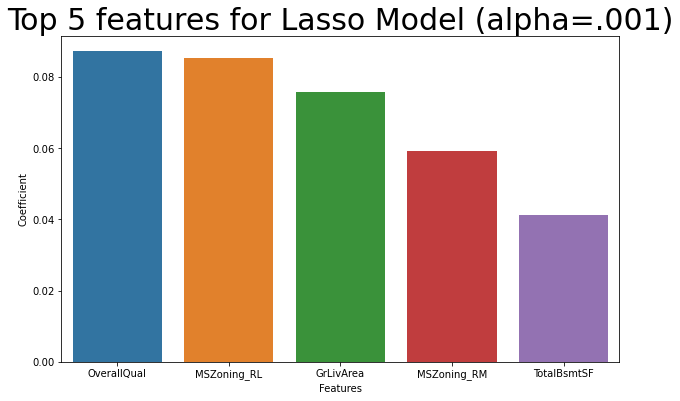

In [182]:
## plotting the top 5 features of lasso model
plt.figure(figsize=(10,6))
sns.barplot(x='Features',y='Coefficient',data=lasso_top_5)
plt.title('Top 5 features for Lasso Model (alpha=.001)',fontsize=30)
plt.show()

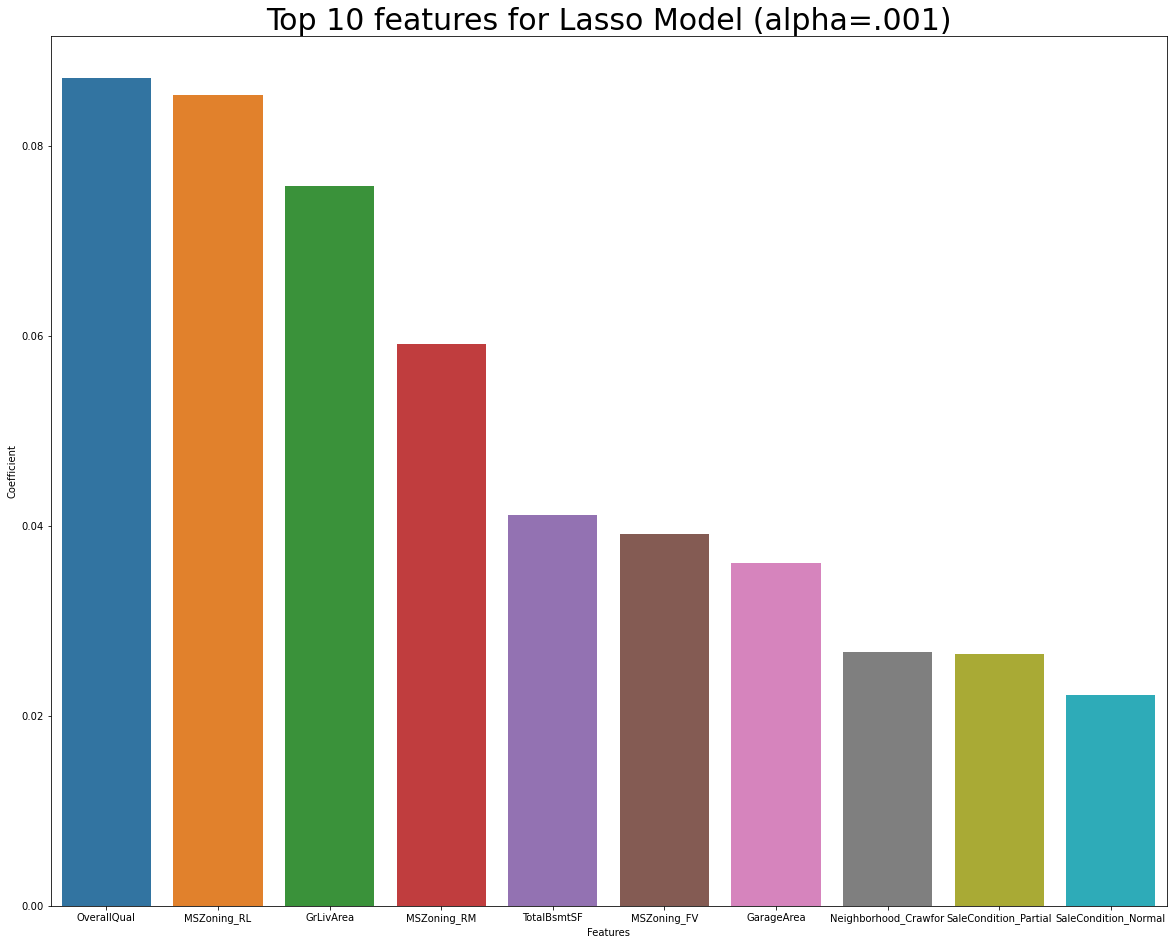

In [183]:
## plotting the top 10 features of lasso model
plt.figure(figsize=(20,16))
sns.barplot(x='Features',y='Coefficient',data=lasso_top_10)
plt.title('Top 10 features for Lasso Model (alpha=.001)',fontsize=30)
plt.show()

### Model Metrics: For both train and test
- We well be looking at the following metrics
- RSS
- R-Squared: r2 score
- MSE
- We will store these values in a list metric3

In [184]:
## we will make a list metric2 to hold all these values
metric3 = []

## r2_score: R-Squared = 1 - RSS/TSS
r2_train_lasso = r2_score(y_train,y_lasso_pred_train)
metric3.append(r2_train_lasso)
r2_test_lasso = r2_score(y_test,y_lasso_pred_test)
metric3.append(r2_test_lasso)
print('r2_train:',r2_train_lasso)
print('r2_test:',r2_test_lasso)

## RSS = 𝛴(y - y_pred)²
RSS_train_lasso = np.sum(np.square(y_train - y_lasso_pred_train))
metric3.append(RSS_train_lasso)
RSS_test_lasso = np.sum(np.square(y_test - y_lasso_pred_test))
metric3.append(RSS_test_lasso)
print('RSS_train:',RSS_train_lasso)
print('RSS_test:',RSS_test_lasso)

## MSE = RSS/N
MSE_train_lasso = mean_squared_error(y_train,y_lasso_pred_train)
metric3.append(MSE_train_lasso)
MSE_test_lasso = mean_squared_error(y_test,y_lasso_pred_test)
metric3.append(MSE_test_lasso)
print('MSE_train:',MSE_train_lasso)
print('MSE_test:',MSE_test_lasso)

print(metric3)



r2_train: 0.9198393878567181
r2_test: 0.886297338325777
RSS_train: 12.648179162022217
RSS_test: 8.105991182280132
MSE_train: 0.012510562969359264
MSE_test: 0.018677399037511824
[0.9198393878567181, 0.886297338325777, 12.648179162022217, 8.105991182280132, 0.012510562969359264, 0.018677399037511824]


### To answer question 1 of assingment Creating lasso model for alpha=.002

In [185]:
## instantiating object
lasso2 = Lasso(alpha = .002)
## fitting X_train and y_traion into the object
lasso2.fit(X_train,y_train)
## making predictions
y_lasso2_pred_train = lasso2.predict(X_train)
y_lasso2_pred_test = lasso2.predict(X_test)

In [186]:
##Creating lasso2_df to contain all coeffcients 
lasso2_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso2.coef_.round(4)})
lasso2_df.reset_index(drop=True, inplace=True)
lasso2_df.sort_values(by=['Coefficient'],inplace=True,ascending=False)
## Creating a dataframe lasso2_top_10 of top 10 features returned by the lasso2 model
lasso2_top_10 = lasso2_df.head(10)
lasso2_top_10

,Features,Coefficient
14,OverallQual,0.0950
7,GrLivArea,0.0848
5,TotalBsmtSF,0.0399
8,GarageArea,0.0350
154,SaleCondition_Partial,0.0260
40,Neighborhood_Crawfor,0.0241
3,BsmtFinSF1,0.0219
153,SaleCondition_Normal,0.0203
26,MSZoning_RL,0.0183
55,Neighborhood_Somerst,0.0173


In [187]:
lasso2_top_5 = lasso2_top_10.head()
lasso2_top_5

,Features,Coefficient
14,OverallQual,0.0950
7,GrLivArea,0.0848
5,TotalBsmtSF,0.0399
8,GarageArea,0.0350
154,SaleCondition_Partial,0.0260


In [188]:
## r2_score: R-Squared = 1 - RSS/TSS
r2_train_lasso2 = r2_score(y_train,y_lasso2_pred_train)
r2_test_lasso2 = r2_score(y_test,y_lasso2_pred_test)

print('r2_train2:',r2_train_lasso2)
print('r2_test2:',r2_test_lasso2)

## RSS = 𝛴(y - y_pred)²
RSS_train_lasso2 = np.sum(np.square(y_train - y_lasso2_pred_train))
RSS_test_lasso2 = np.sum(np.square(y_test - y_lasso2_pred_test))
print('RSS_train2:',RSS_train_lasso2)
print('RSS_test2:',RSS_test_lasso2)

## MSE = RSS/N
MSE_train_lasso2 = mean_squared_error(y_train,y_lasso2_pred_train)
MSE_test_lasso2 = mean_squared_error(y_test,y_lasso2_pred_test)
print('MSE_train2:',MSE_train_lasso2)
print('MSE_test2:',MSE_test_lasso2)

r2_train2: 0.9130180993368373
r2_test2: 0.8823198602610391
RSS_train2: 13.72447931752856
RSS_test2: 8.389550086229576
MSE_train2: 0.013575152638505006
MSE_test2: 0.019330760567349253


## We will put all the metrics from the three models i.e Linear, Ridge( alpha=50) and Lasso(alpha=.001) into a dataframe for better Comparison.

In [189]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_table

{'Metric': ['R2 Score (Train)',
  'R2 Score (Test)',
  'RSS (Train)',
  'RSS (Test)',
  'MSE (Train)',
  'MSE (Test)'],
 'Linear Regression': [0.924207985009202,
  -1.4500935653821727e+26,
  11.958878045252415,
  1.0337880821248917e+28,
  0.011828761666916337,
  2.382000189227861e+25]}

In [190]:
## now we will convert this table into a dataframe
lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
lr_metric

,Metric,Linear Regression
0,R2 Score (Train),9.242080e-01
1,R2 Score (Test),-1.450094e+26
2,RSS (Train),1.195888e+01
3,RSS (Test),1.033788e+28
4,MSE (Train),1.182876e-02
5,MSE (Test),2.382000e+25


In [191]:
## Now we will create 2 pd series for Ridge and Lasso
## and we will concat these series to the dataframe lr_metric

## series for Ridge
rg_metric = pd.Series(metric2,name='Ridge Regression')
## series for Lasso
las_metric = pd.Series(metric3,name='Lasso Regression')

## concatenating both series to dataframe lr_metric
final_metric = pd.concat([lr_metric,rg_metric,las_metric],axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.242080e-01,0.919471,0.919839
1,R2 Score (Test),-1.450094e+26,0.884802,0.886297
2,RSS (Train),1.195888e+01,12.706290,12.648179
3,RSS (Test),1.033788e+28,8.212614,8.105991
4,MSE (Train),1.182876e-02,0.012568,0.012511
5,MSE (Test),2.382000e+25,0.018923,0.018677


## Let's observe the changes in the coefficients after regularization

In [192]:
## creating a dataframe
betas = pd.DataFrame(index=X.columns)
betas

""
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtUnfSF
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [193]:
## fill the rows of betas with X.columns vales
betas.rows = X.columns
betas

""
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtUnfSF
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [194]:
## defining columns 
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [195]:
pd.set_option('display.max_rows', None)
betas.head(155)

,Linear,Ridge,Lasso
LotFrontage,4.942022e-03,0.008532,0.007879
LotArea,1.289210e-02,0.014228,0.012446
MasVnrArea,-3.602818e-03,-0.000863,-0.000000
BsmtFinSF1,1.737441e-02,0.022010,0.020233
BsmtUnfSF,1.122126e-04,0.003382,-0.000000
TotalBsmtSF,4.458630e-02,0.042061,0.041176
2ndFlrSF,2.553105e-02,0.021181,0.014941
GrLivArea,6.809105e-02,0.057058,0.075838
GarageArea,4.037471e-02,0.031649,0.036126
WoodDeckSF,1.655461e-02,0.015871,0.015282


# Conclusion:

- Both the models had almost the same performance in terms of the metrics that we chose to evaluate the models
- We will apply lasso regression for the following reasons:

  -  A) Occam’s Razor: 
   When in doubt choose the simpler model.
    Lasso produced a model which was  simpler as lasso performed variable selection and removed unnecessary noise. We could afford this as the number of predictor variables was high.

  - B) Only a few among the predictors had a significant impact on the response variable as we saw during the EDA by making the heatmaps

  - C) The numbers of variables was high and even though we eliminated some columns, the chance of noisy variables being still being in the dataset was high.

  - D) Because of the feature selection it is easier to interpret the model generated by lasso as compared to that generated by ridge


### Top 10 variables that are significant in predicting the price of a house are:

In [196]:
## Creating a dataframe lasso_top_10 of top 10 features returned by the lasso model
lasso_top_10 = lasso_df.head(10)
lasso_top_10

,Features,Coefficient
14,OverallQual,0.0872
26,MSZoning_RL,0.0854
7,GrLivArea,0.0758
27,MSZoning_RM,0.0592
5,TotalBsmtSF,0.0412
24,MSZoning_FV,0.0392
8,GarageArea,0.0361
40,Neighborhood_Crawfor,0.0267
154,SaleCondition_Partial,0.0265
153,SaleCondition_Normal,0.0222


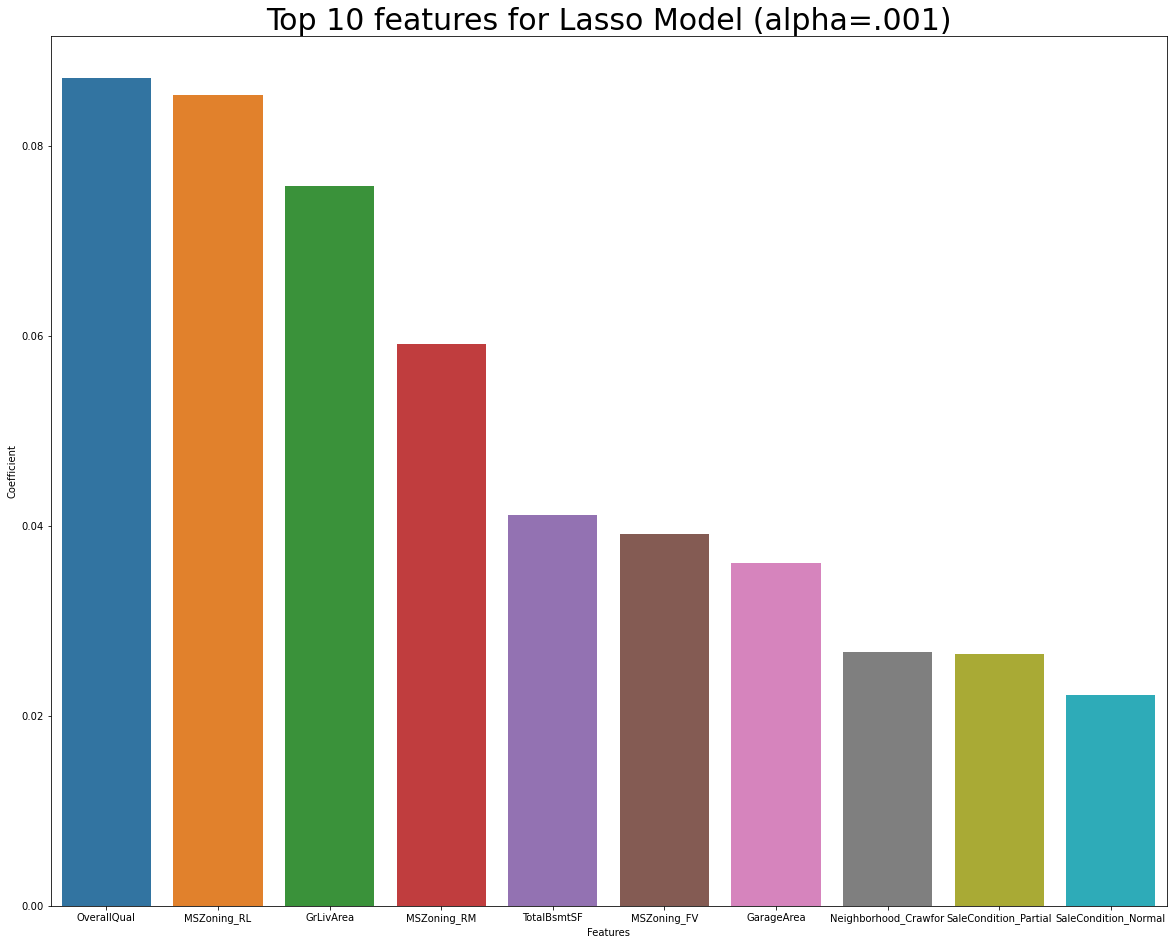

In [197]:
## plotting the top 10 features of lasso model
plt.figure(figsize=(20,16))
sns.barplot(x='Features',y='Coefficient',data=lasso_top_10)
plt.title('Top 10 features for Lasso Model (alpha=.001)',fontsize=30)
plt.show()

### How well those variables describe the price of a house is indicated by their respective coefficients and overall accuracy of the model which is pretty good.

## Q4. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

### How we will approach this problem:
- 1. First check the five most important predictor variables in the lasso model
- 2. Again we will make a new dataframe housing_final_lasso by concatenating housing_categorical and housing_continous.
- 3. From this dataframe we will drop the five most important predictor variables in the lasso model
- 4. We will do the data preparation steps on this housing_final_lasso to create variables to be fed into the new lasso model.
- 5. Feed the varaibles in the new model
- 6. Check the top 5 most important predictor variables in the new lasso model

In [198]:
## Five most important predictor variables in the lasso model
lasso_top_5 = lasso_df.head()
lasso_top_5

,Features,Coefficient
14,OverallQual,0.0872
26,MSZoning_RL,0.0854
7,GrLivArea,0.0758
27,MSZoning_RM,0.0592
5,TotalBsmtSF,0.0412


In [199]:
## creating housing_final_lasso
housing_final_lasso = pd.concat([housing_continous,housing_categorical],axis=1)

In [200]:
## dropping lasso_top_5 columns from housing_final_lasso
housing_final_lasso = housing_final_lasso.drop(['OverallQual','MSZoning_RL','GrLivArea','MSZoning_RM','TotalBsmtSF'],axis=1)

In [201]:
## checking null values in housing_final_lasso
np.where(np.isnan(housing_final_lasso))

(array([ 249,  249,  249,  249,  249,  249,  249,  249,  249,  249,  249,
         249,  249,  313,  313,  313,  313,  313,  313,  313,  313,  313,
         313,  313,  313,  313,  335,  335,  335,  335,  335,  335,  335,
         335,  335,  335,  335,  335,  335,  346,  346,  346,  346,  346,
         346,  346,  346,  346,  346,  346,  346,  346,  510,  510,  510,
         510,  510,  510,  510,  510,  510,  510,  510,  510,  510,  539,
         539,  539,  539,  539,  539,  539,  539,  539,  539,  539,  539,
         539,  705,  705,  705,  705,  705,  705,  705,  705,  705,  705,
         705,  705,  705,  706,  706,  706,  706,  706,  706,  706,  706,
         706,  706,  706,  706,  706,  890,  890,  890,  890,  890,  890,
         890,  890,  890,  890,  890,  890,  890,  934,  934,  934,  934,
         934,  934,  934,  934,  934,  934,  934,  934,  934, 1230, 1230,
        1230, 1230, 1230, 1230, 1230, 1230, 1230, 1230, 1230, 1230, 1230,
        1298, 1298, 1298, 1298, 1298, 

In [202]:
## dropping null values from housing_final_lasso
housing_final_lasso =  housing_final_lasso.dropna()

### Splitting into X and y lables

In [203]:
## Creating y_lasso_new
y_lasso_new = housing_final_lasso.pop('SalePrice')

In [204]:
## Creating X_lasso_new
X_lasso_new = housing_final_lasso

### Scaling

In [205]:
## importing libraries
from sklearn.preprocessing import StandardScaler
## instantiating object
scaler = StandardScaler()
## storing column names as scaling using StandardScaler converts dataframe into an array
X_lasso_new_cols = X_lasso_new.columns
## implementing scaling
X_lasso_new = pd.DataFrame(scaler.fit_transform(X_lasso_new))
## reassigning column names
X_lasso_new.columns = X_lasso_new_cols

### Splitting into train and test

In [206]:
X_train_lasso,X_test_lasso,y_train_lasso,y_test_lasso = train_test_split(X_lasso_new,y_lasso_new,train_size=0.7,test_size=0.3,random_state=100)

In [207]:
## fitting into model_cv_lasso
## we have already done the model_cv_lasso while making the lasso model
model_cv_lasso.fit(X_train_lasso,y_train_lasso)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [208]:
## getting the best value for alpha
print('The best value of Alpha:',model_cv_lasso.best_params_)

The best value of Alpha: {'alpha': 0.001}


### Creating model

In [209]:
## instantiating object
lasso = Lasso(alpha = .001)
## fitting X_train and y_traion into the object
lasso.fit(X_train_lasso,y_train_lasso)
## making predictions
y_lasso_pred_train = lasso.predict(X_train_lasso)
y_lasso_pred_test = lasso.predict(X_test_lasso)

In [210]:
##Creating lasso_df to contain all coeffcients 
lasso_new_df = pd.DataFrame({'Features':X_train_lasso.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_new_df.reset_index(drop=True, inplace=True)
lasso_new_df.sort_values(by=['Coefficient'],inplace=True,ascending=False)
lasso_new_df.head()

,Features,Coefficient
3,BsmtFinSF1,0.0612
4,BsmtUnfSF,0.0542
5,2ndFlrSF,0.0470
6,GarageArea,0.0438
16,TotRmsAbvGrd,0.0433


In [211]:
lasso_new_top5 = lasso_new_df.head()

- The top 5 features in the new lasso model

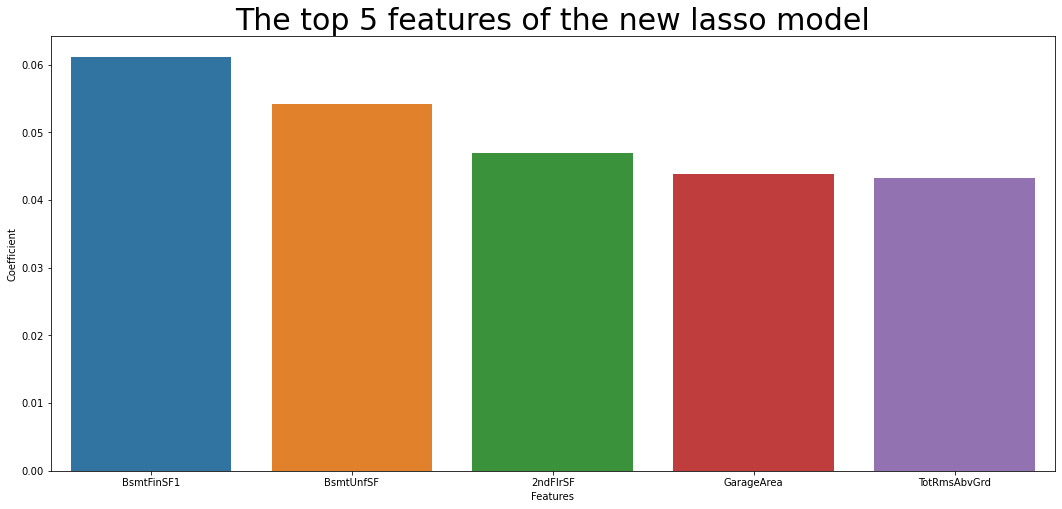

In [212]:
## plotting the top 10 features of lasso model
plt.figure(figsize=(18,8))
sns.barplot(x='Features',y='Coefficient',data=lasso_new_top5)
plt.title('The top 5 features of the new lasso model',fontsize=30)
plt.show()